In [44]:
import datajoint as dj
import seaborn as sns
from datetime import datetime, timedelta
sns.set_context("talk")

dj.blob.use_32bit_dims = True  # necessary for pd.blob read

import behav_viz.ingest as ingest
import behav_viz.visualize as viz
import behav_viz.utils as utils
FIGURES_PATH = utils.dir_utils.get_figures_path("rats", "alpha")

from config_alpha_experiment import *

# settings
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Animals

In [45]:
ANIMAL_IDS = ALPHA_1_ANIMALS + ALPHA_2_ANIMALS
MIN_DATE = get_start_date(group="alpha_1", type="str")

## Load in Trials & Days Data

In [47]:
trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=MIN_DATE
)

[2024-07-28 12:37:03,582][WARNING]: MySQL server has gone away. Reconnecting to the server.


animal_id R040
Fetched 8 dates from Sessions table from 2024-07-20 to 2024-07-27 for R040

animal_id R041
Fetched 8 dates from Sessions table from 2024-07-20 to 2024-07-27 for R041

animal_id R042
Fetched 8 dates from Sessions table from 2024-07-20 to 2024-07-27 for R042

animal_id R043
Fetched 8 dates from Sessions table from 2024-07-20 to 2024-07-27 for R043

animal_id R044
Fetched 7 dates from Sessions table from 2024-07-20 to 2024-07-27 for R044

animal_id R045
Fetched 7 dates from Sessions table from 2024-07-20 to 2024-07-26 for R045

animal_id R046
Fetched 8 dates from Sessions table from 2024-07-20 to 2024-07-27 for R046

animal_id R047
Fetched 8 dates from Sessions table from 2024-07-20 to 2024-07-27 for R047

animal_id R048
Fetched 1 dates from Sessions table from 2024-07-27 to 2024-07-27 for R048

animal_id R049
no sessions found for R049 between 2024-07-20 and 2030-01-01
animal_id R050
Fetched 1 dates from Sessions table from 2024-07-27 to 2024-07-27 for R050

animal_id R051

In [50]:
days_df = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=MIN_DATE, verbose=True
)

Fetched data from SessionAggDate table from 2024-07-20 to 2024-07-27  
	Last date on the database is 2024-07-27 but user is querying data 
	for 2024-07-28. Attempting to manually aggregate today's data.
No new data from today, 2024-07-28 to add to SessionAggDate.

72 daily summaries fetched for animals: 
['R040', 'R041', 'R042', 'R043', 'R044', 'R045', 'R046', 'R047', 'R048', 'R049', 'R050', 'R051', 'R052', 'R053', 'R054', 'R055', 'R056', 'R057']
between 2024-07-20 and 2024-07-27



---
# Alpha 1s
These animals started first and all run in session 6

## Plot over Days

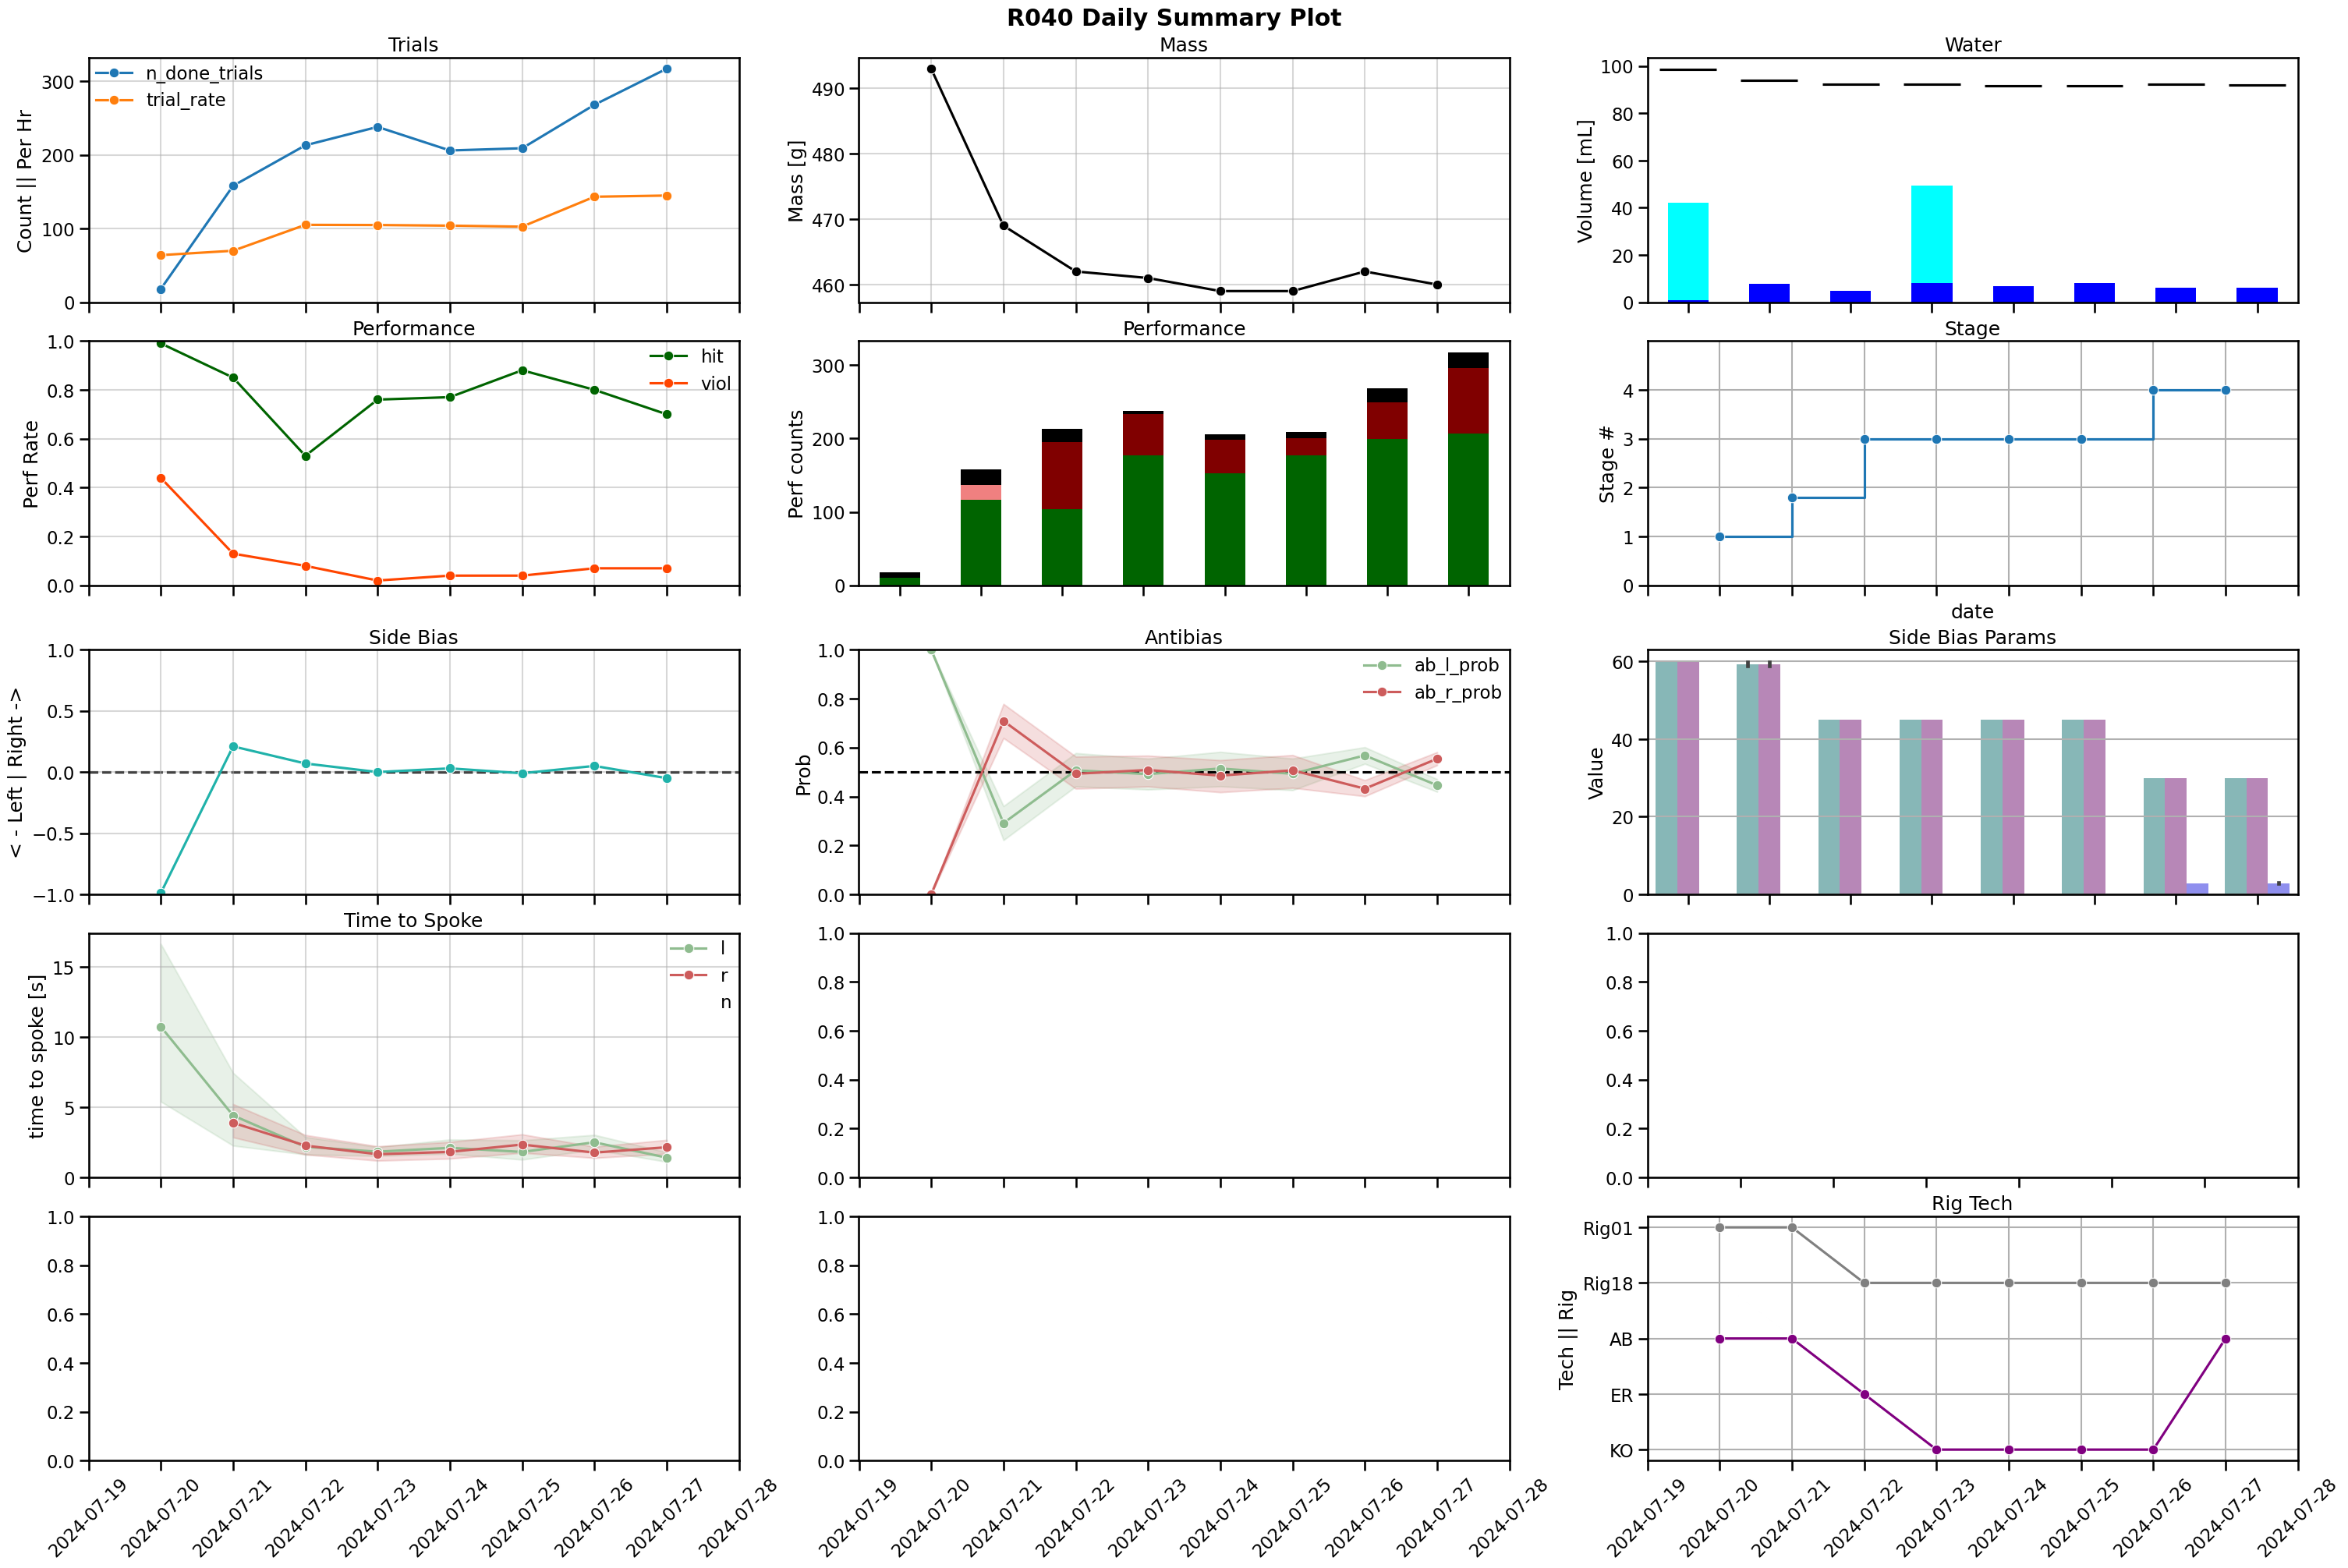

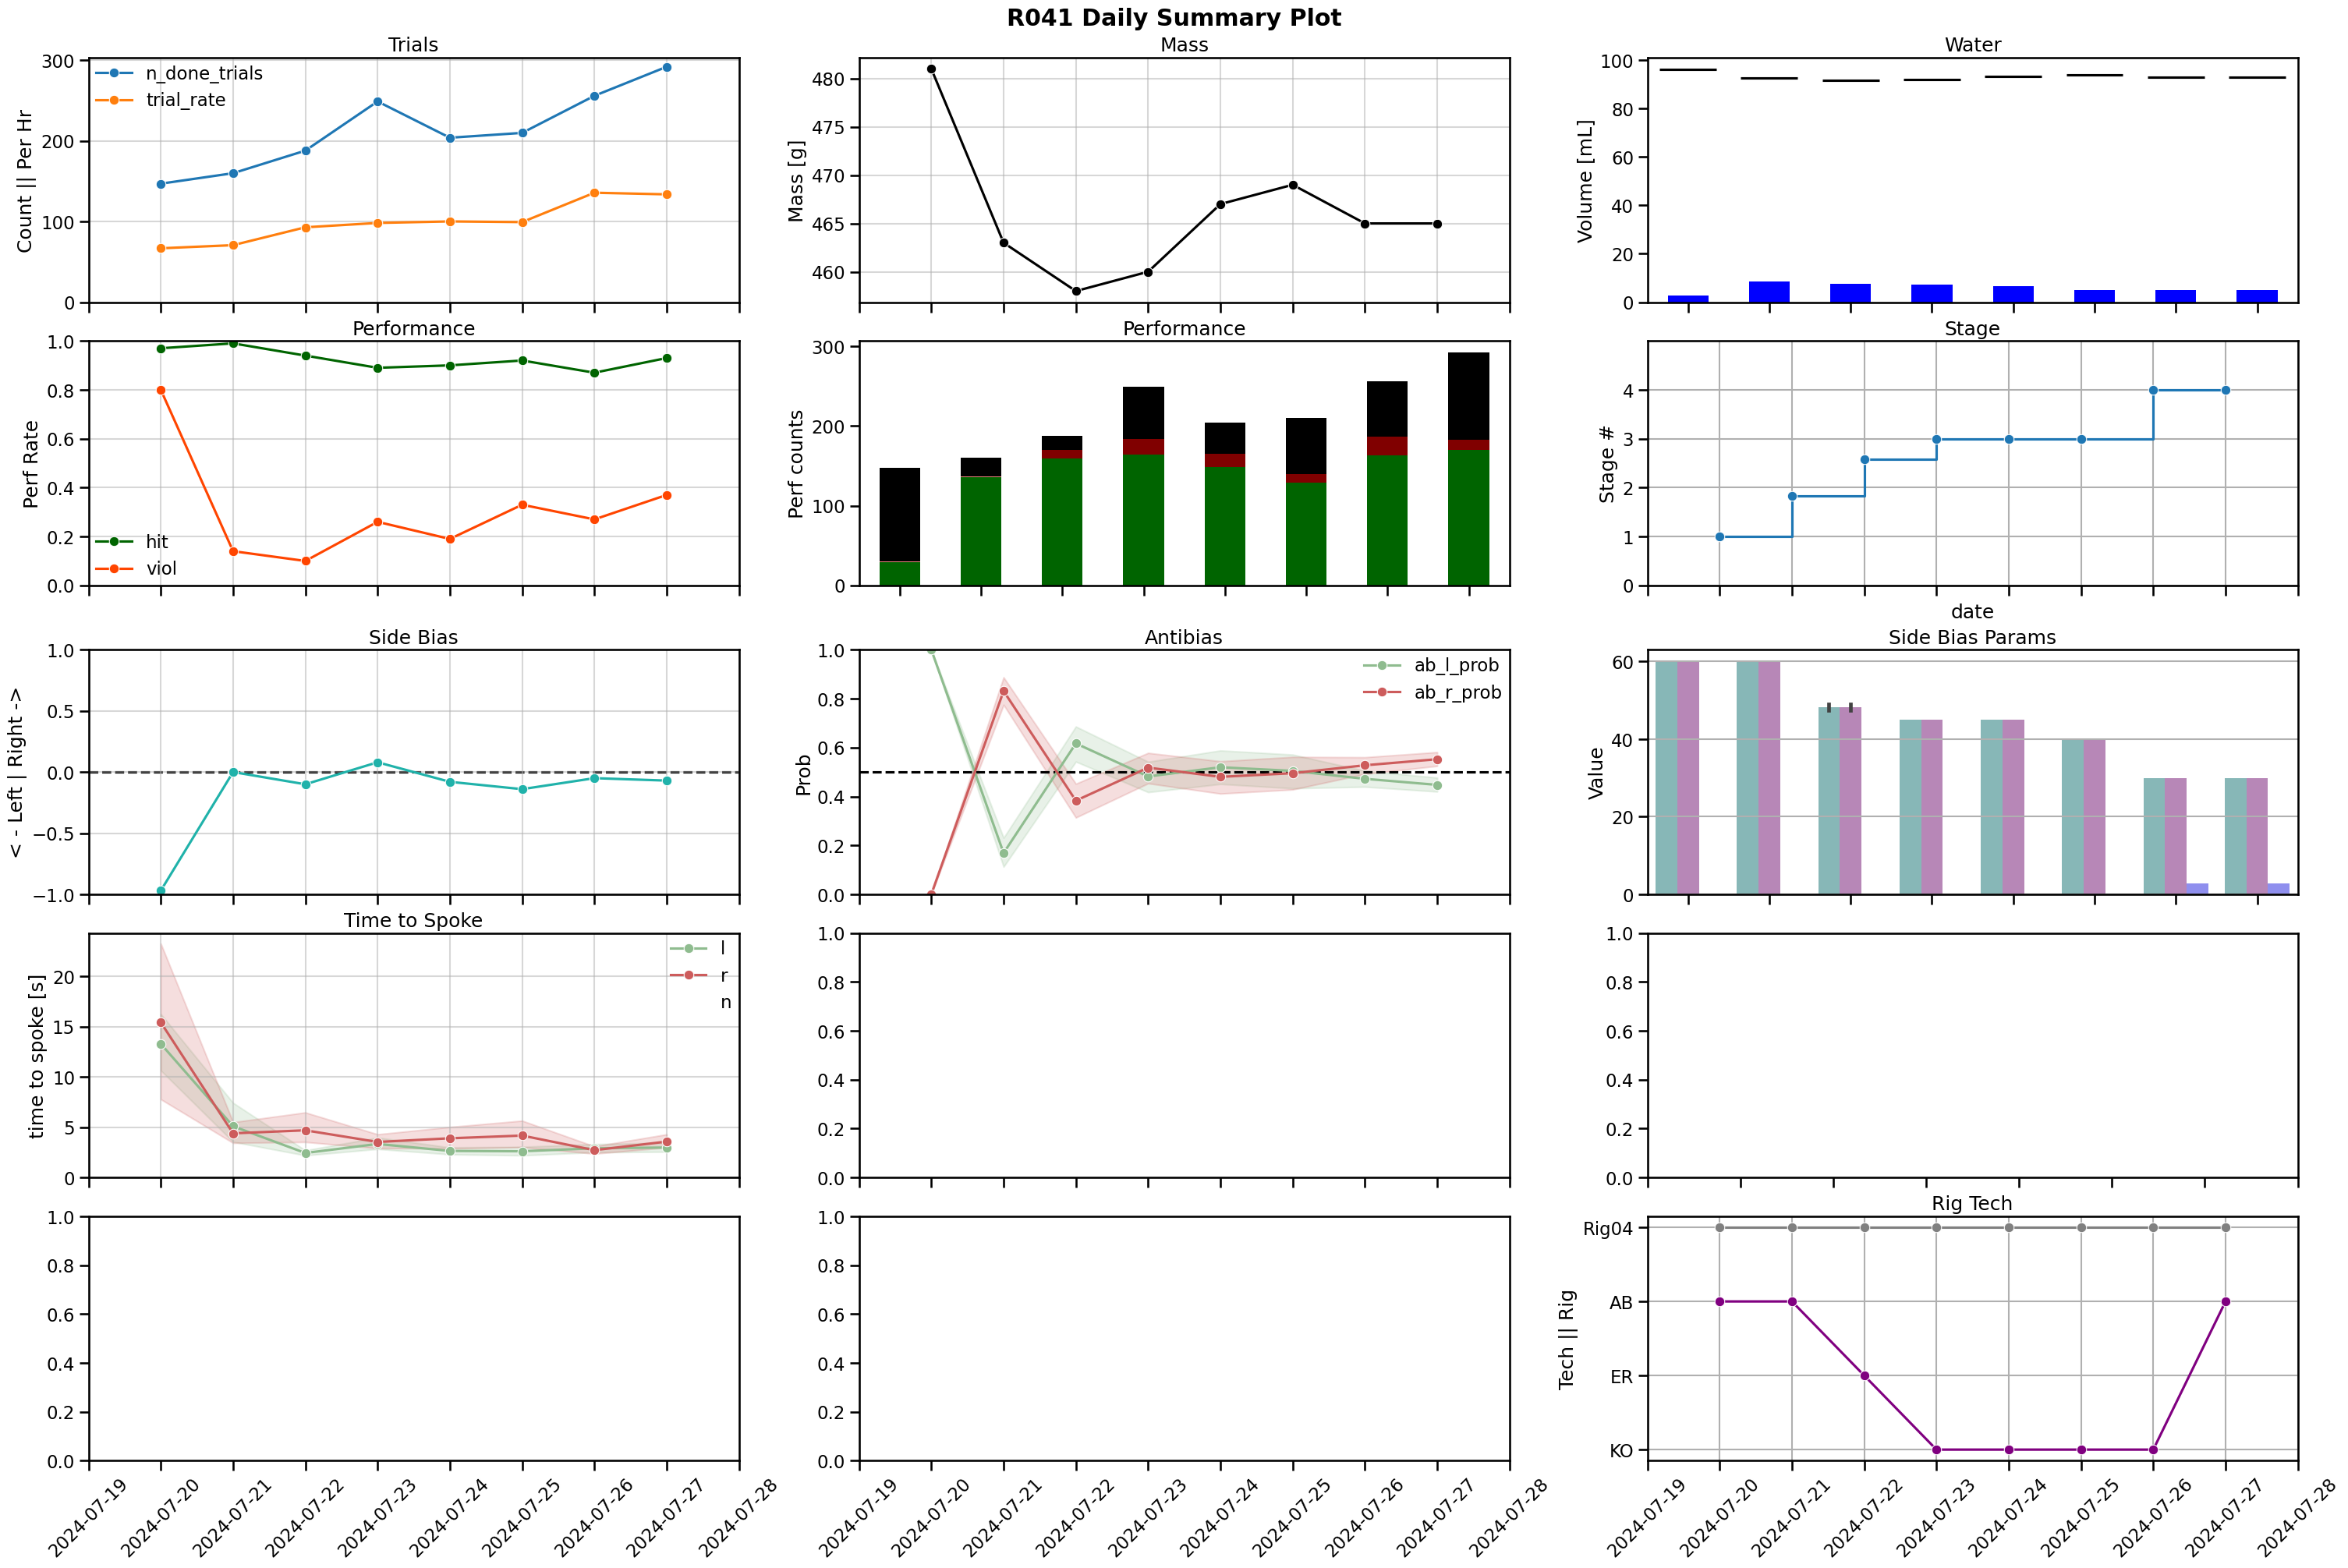

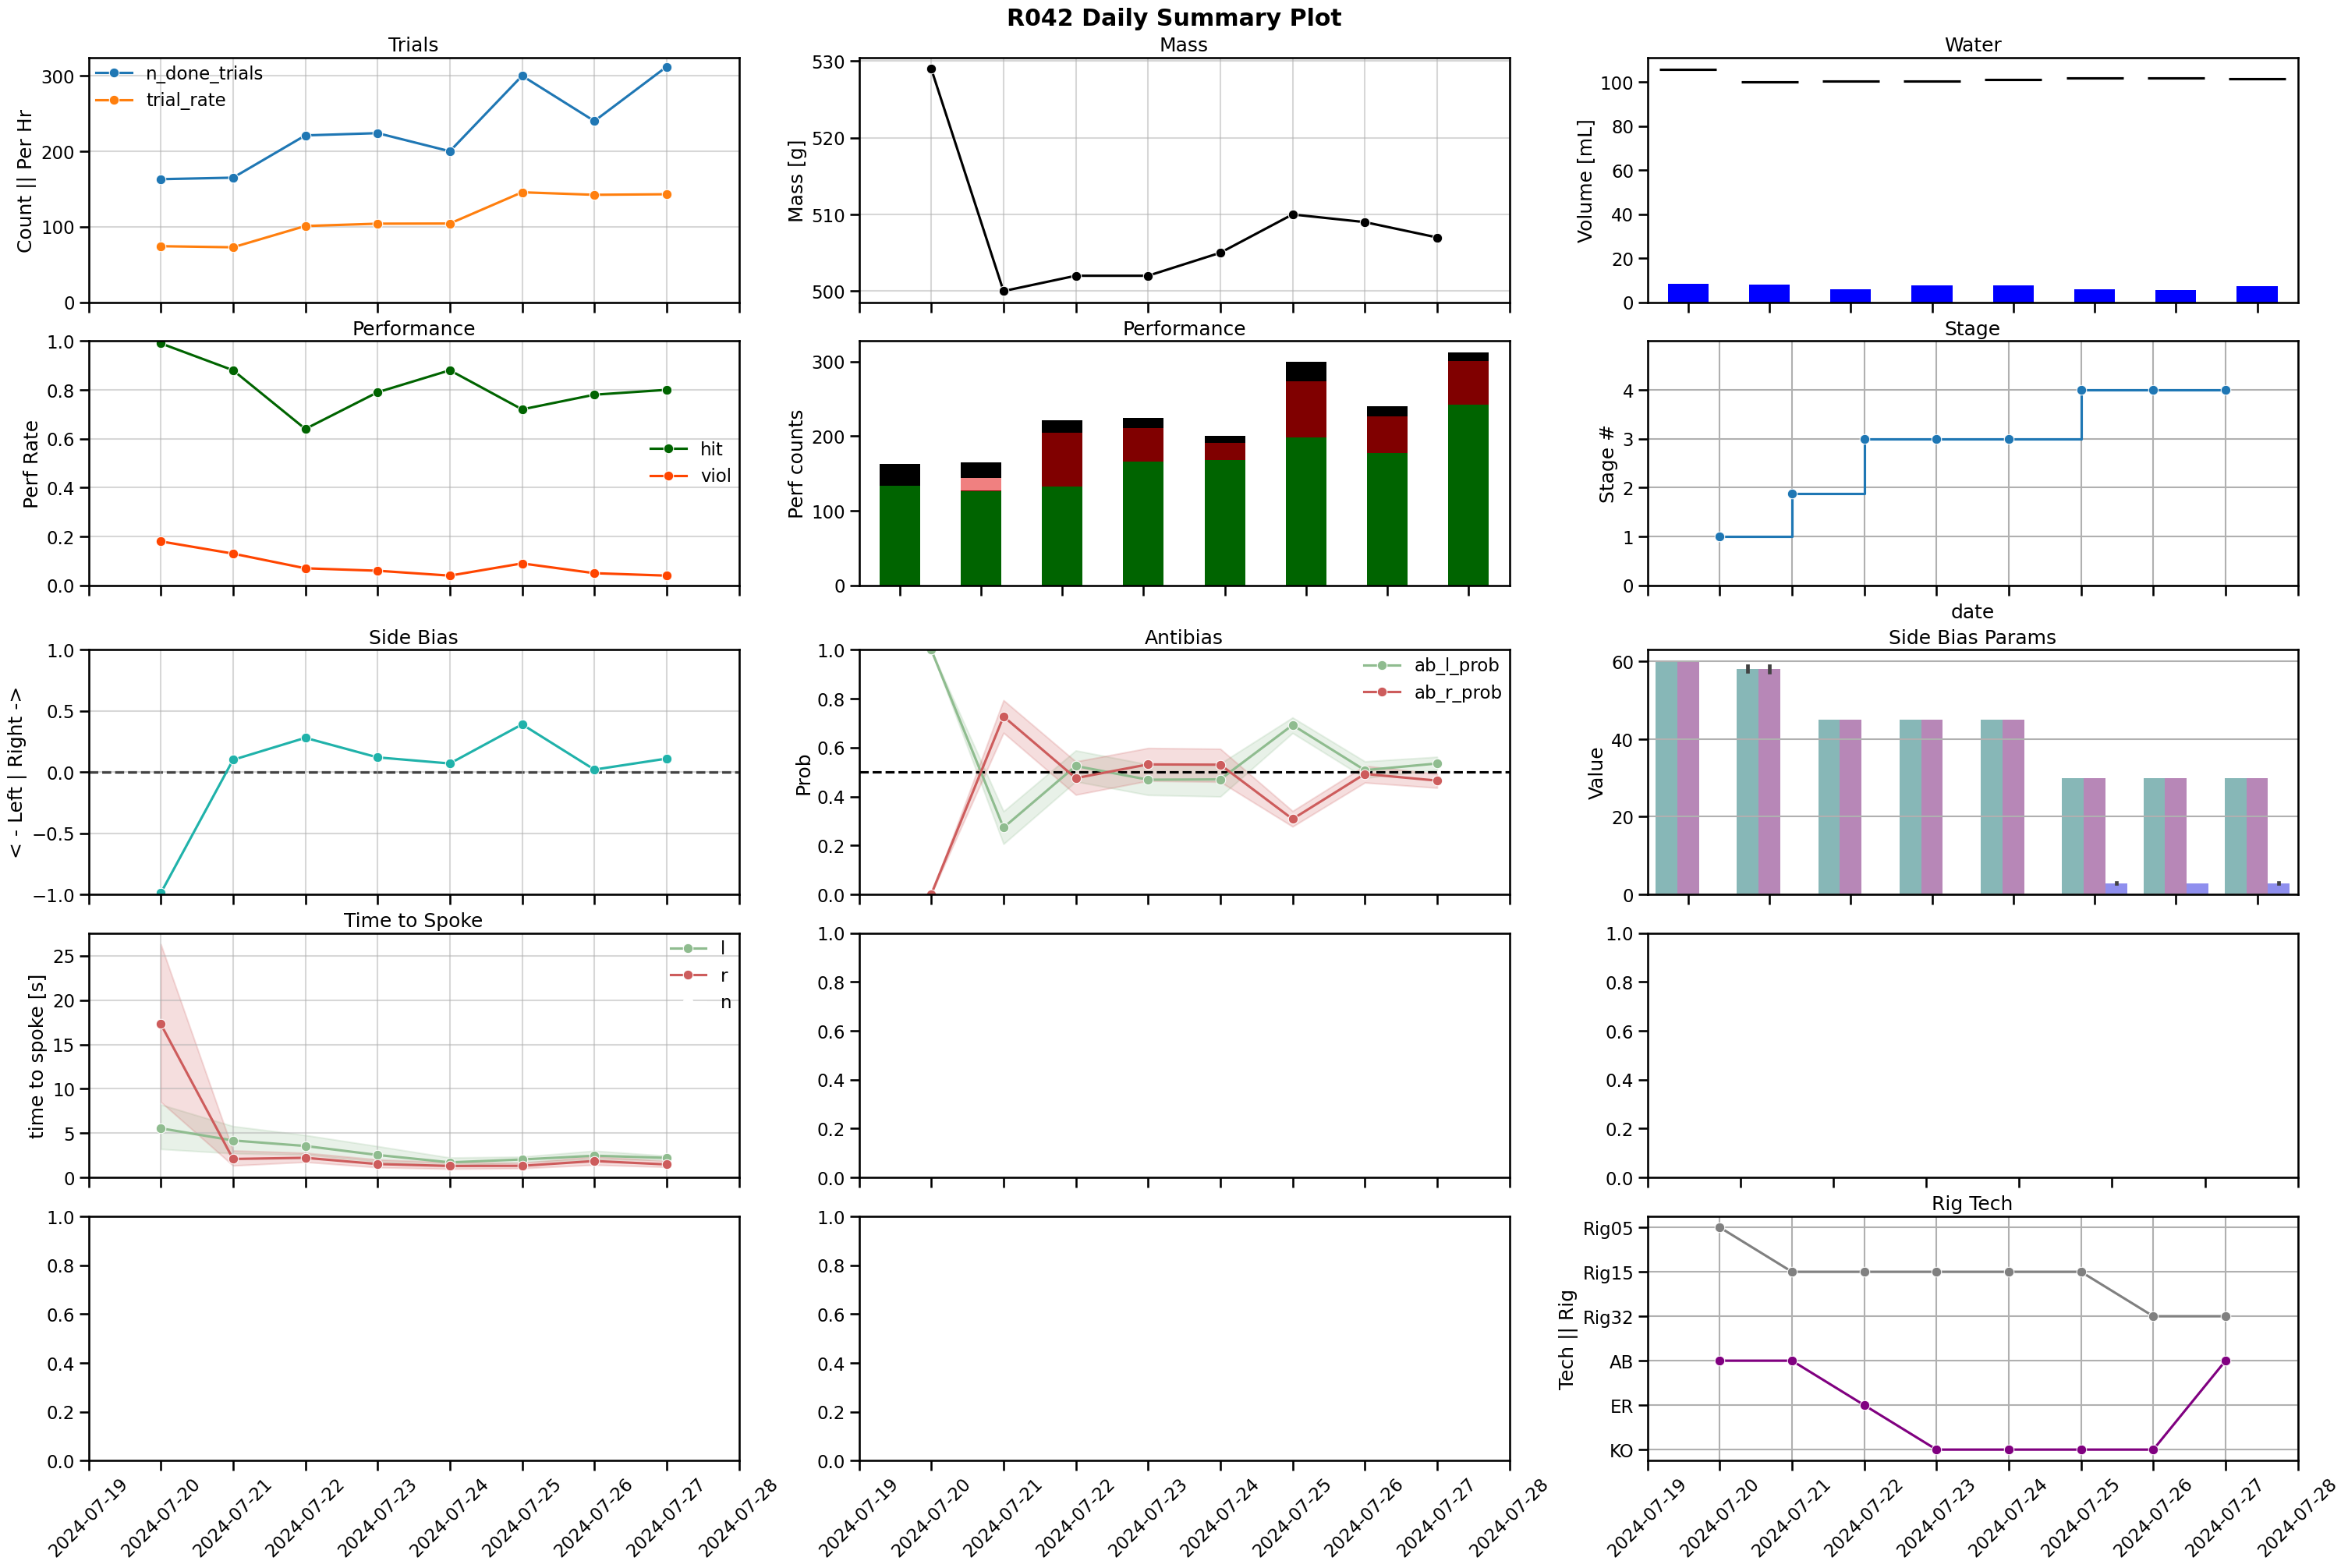

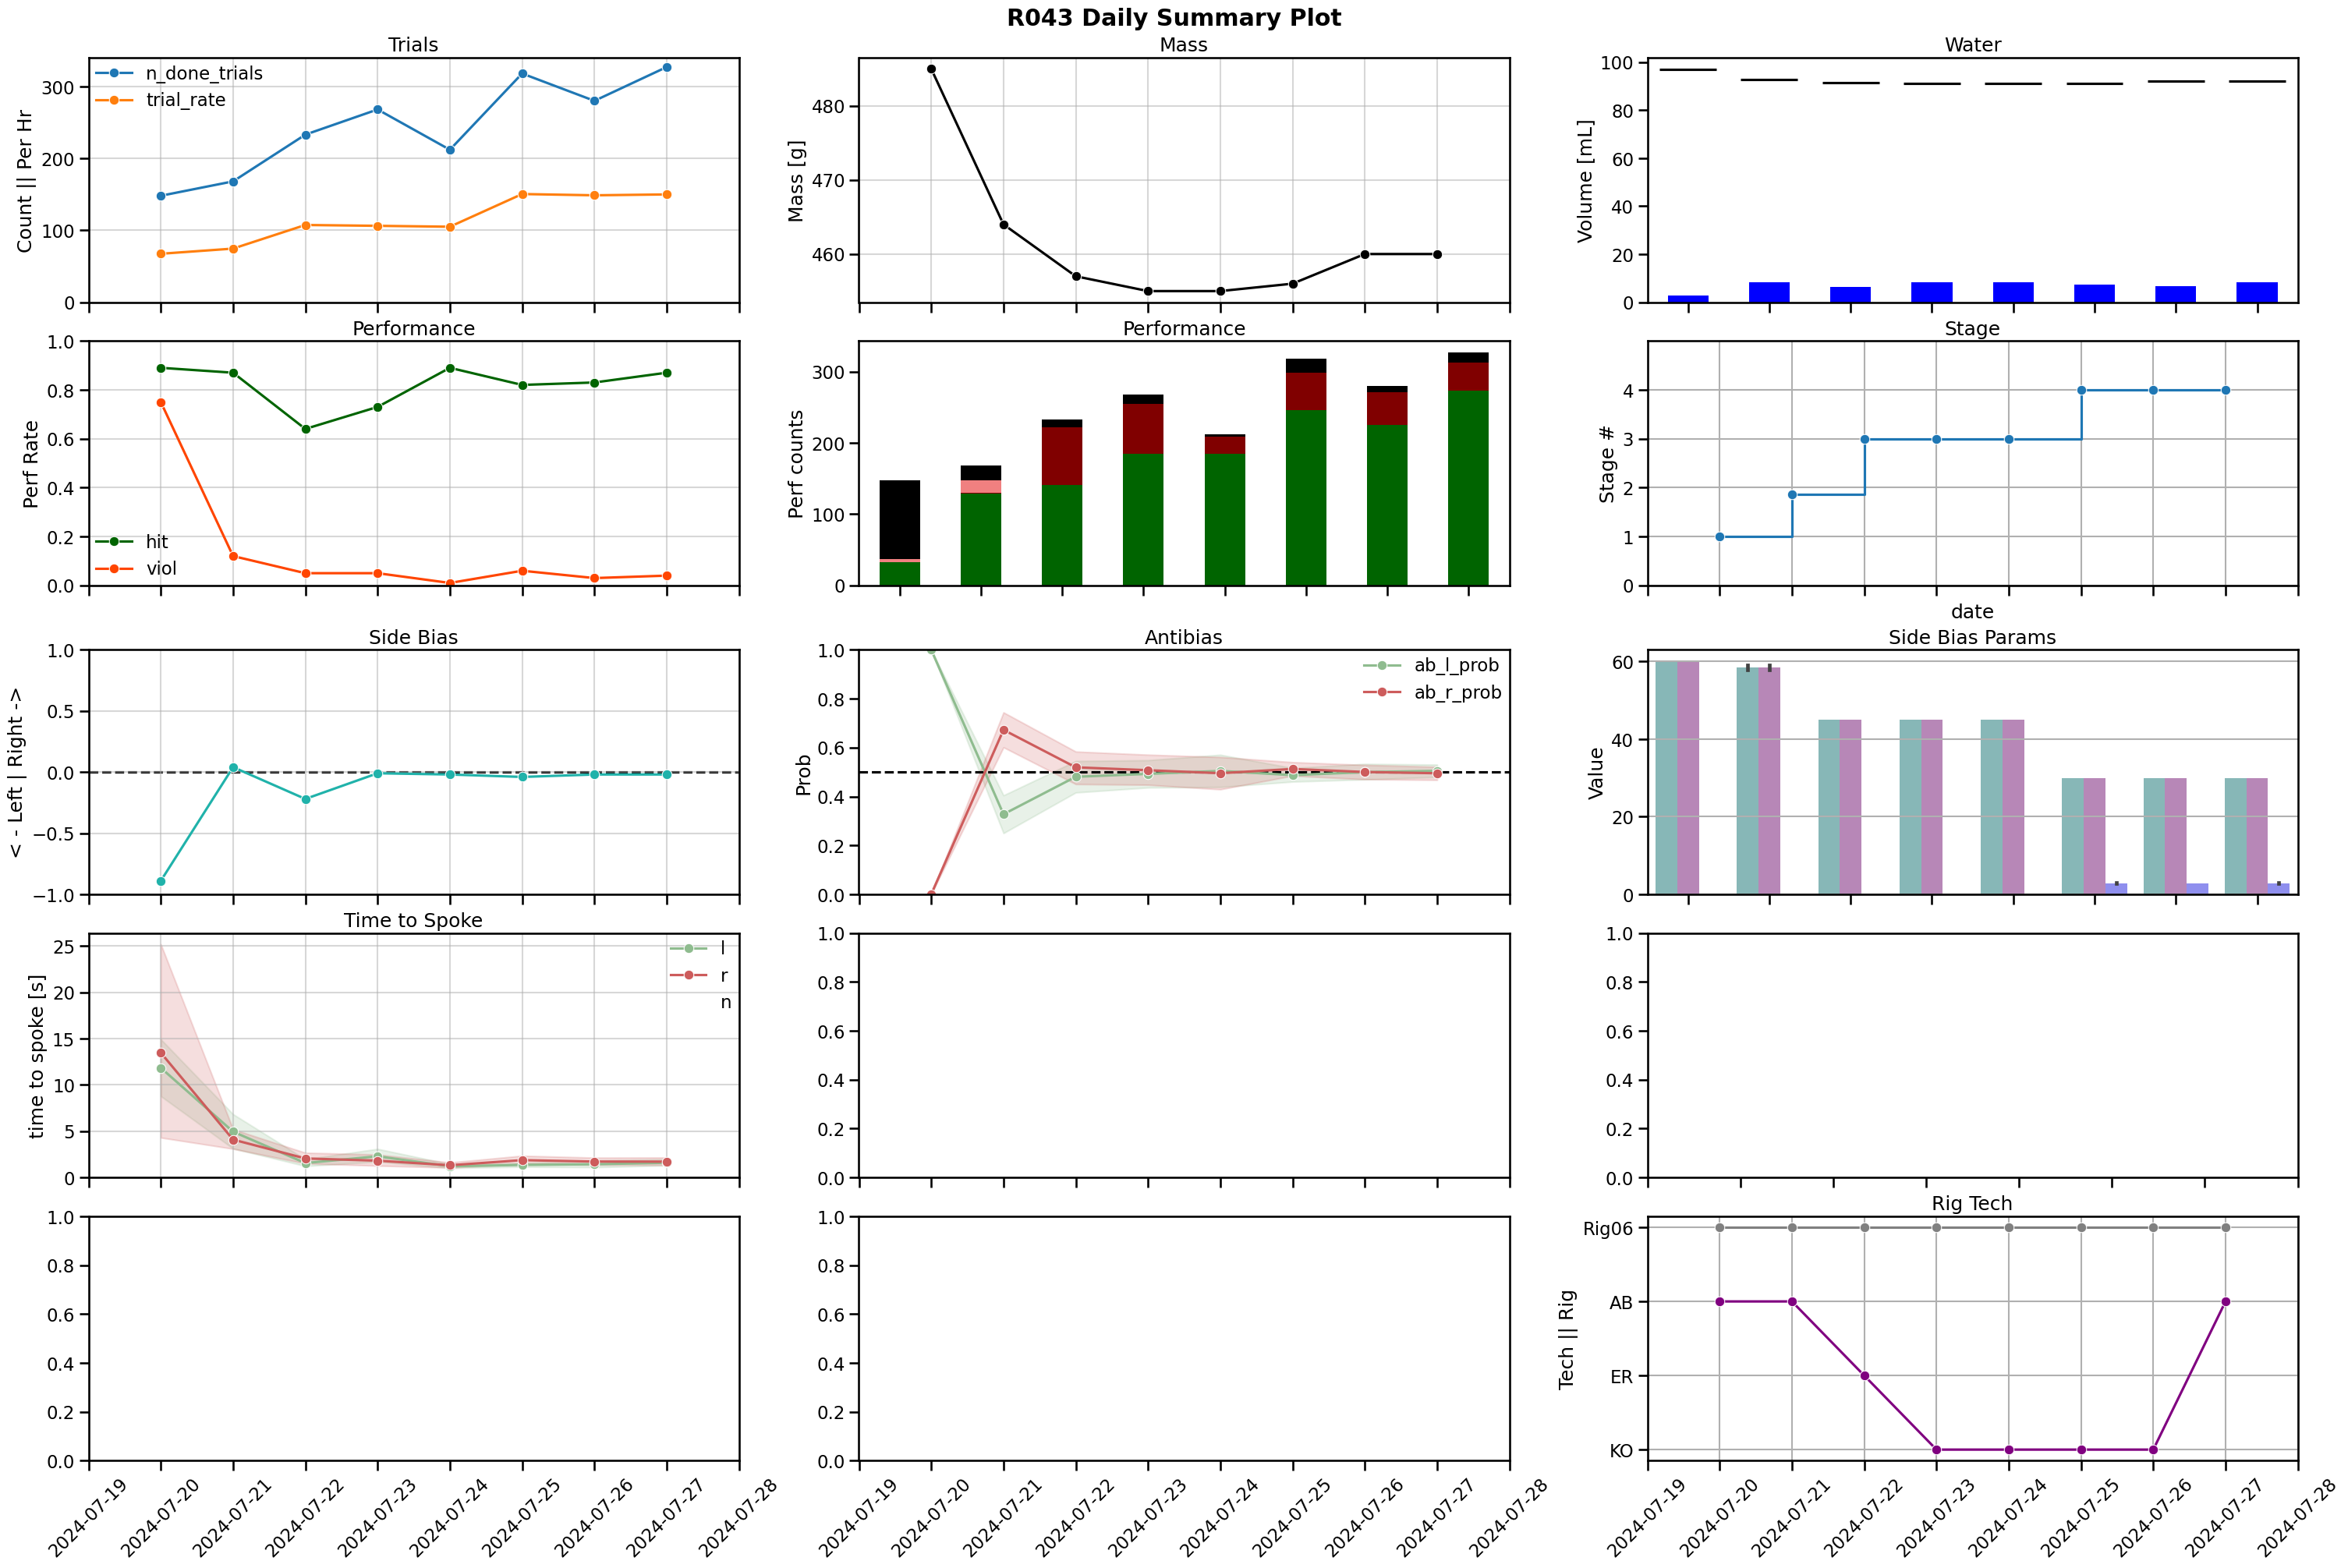

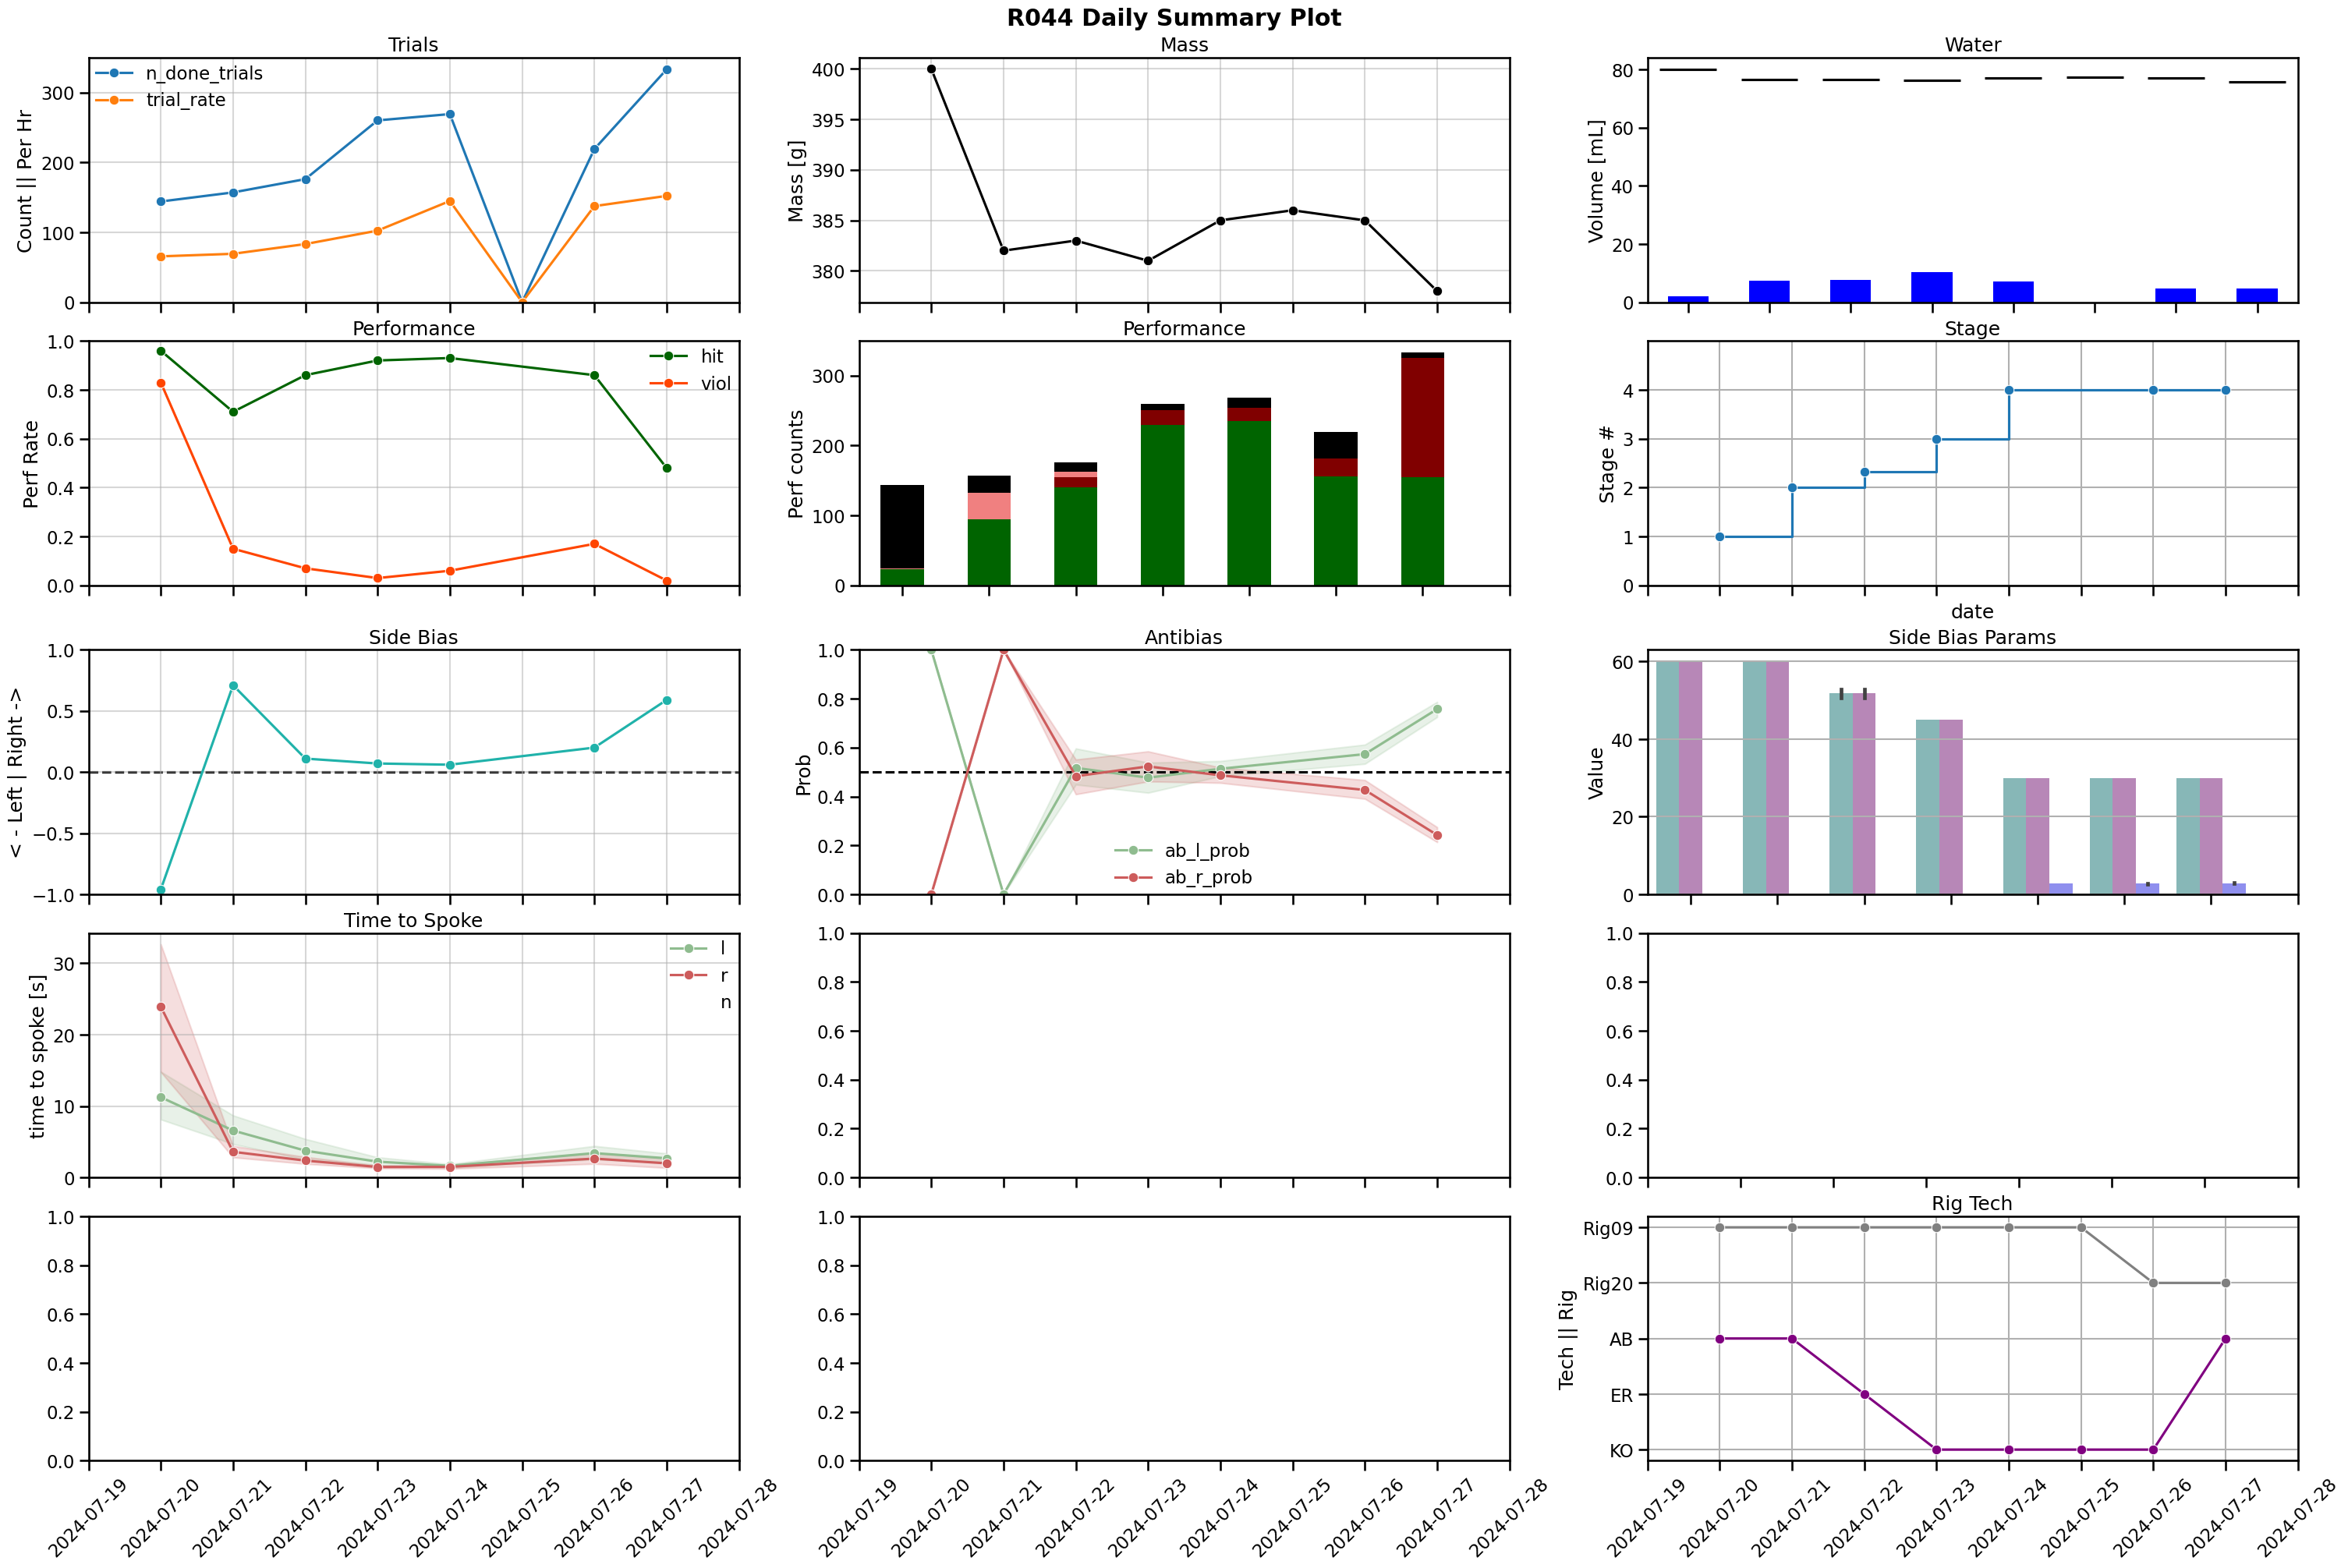

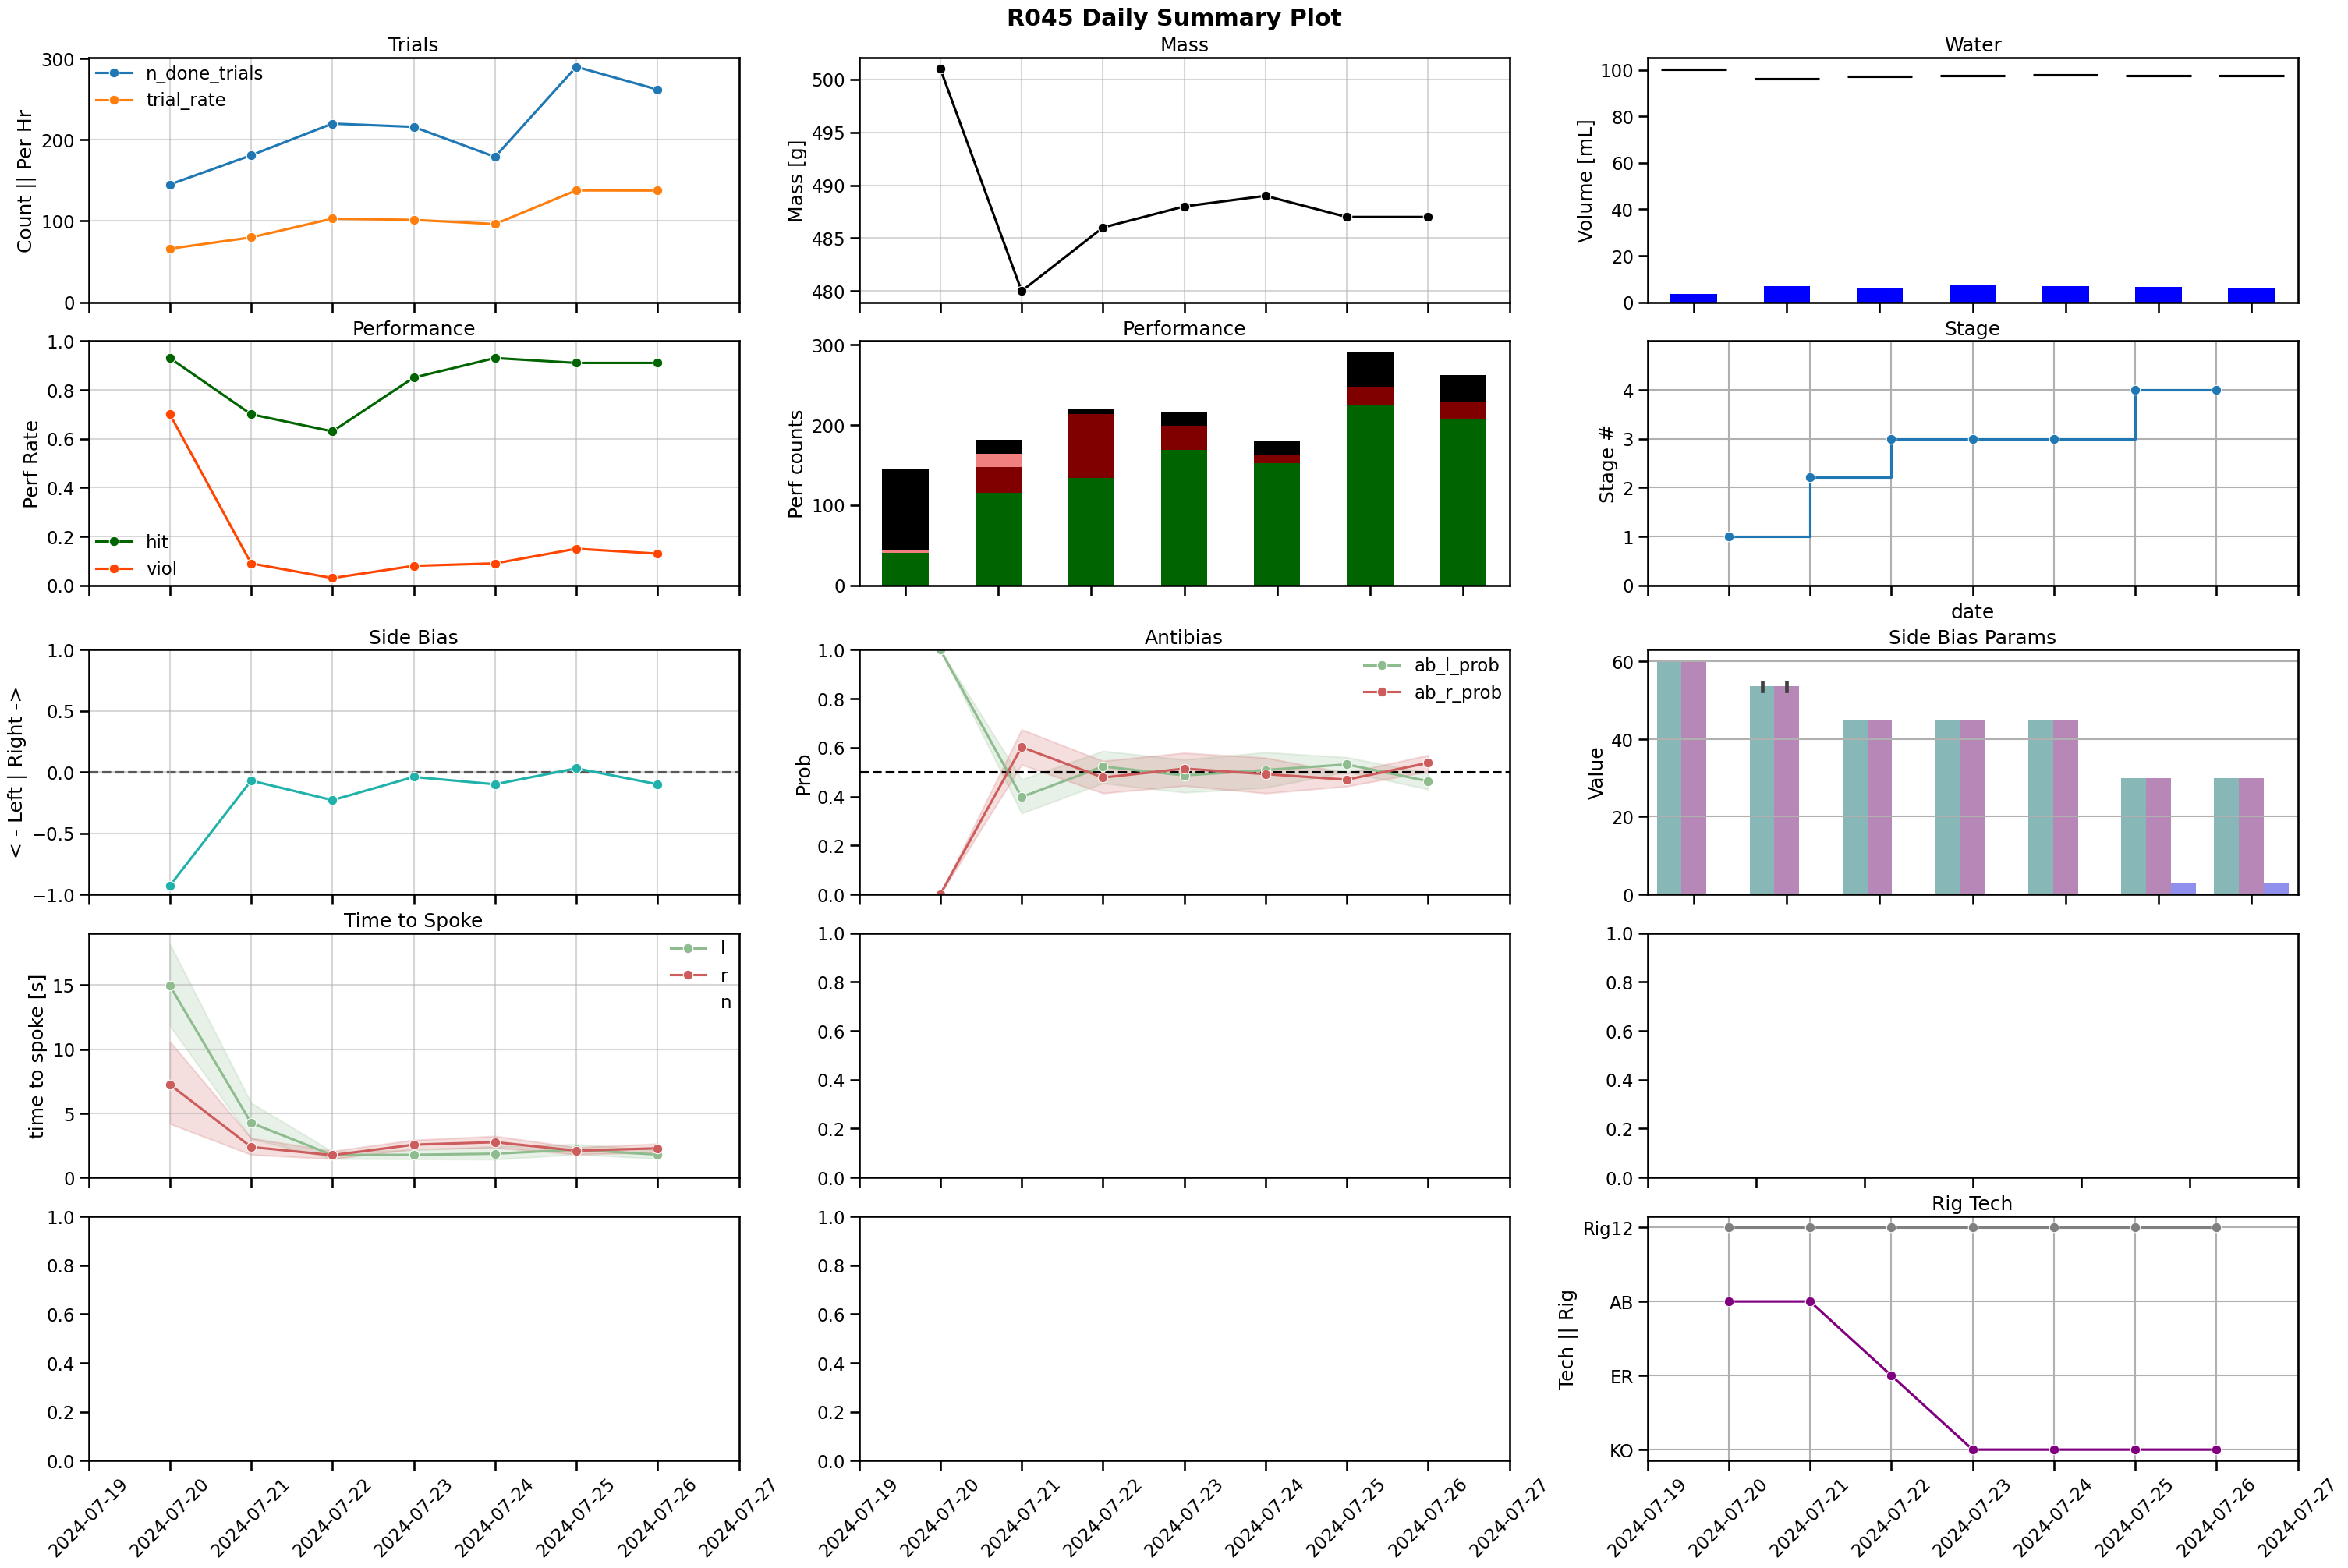

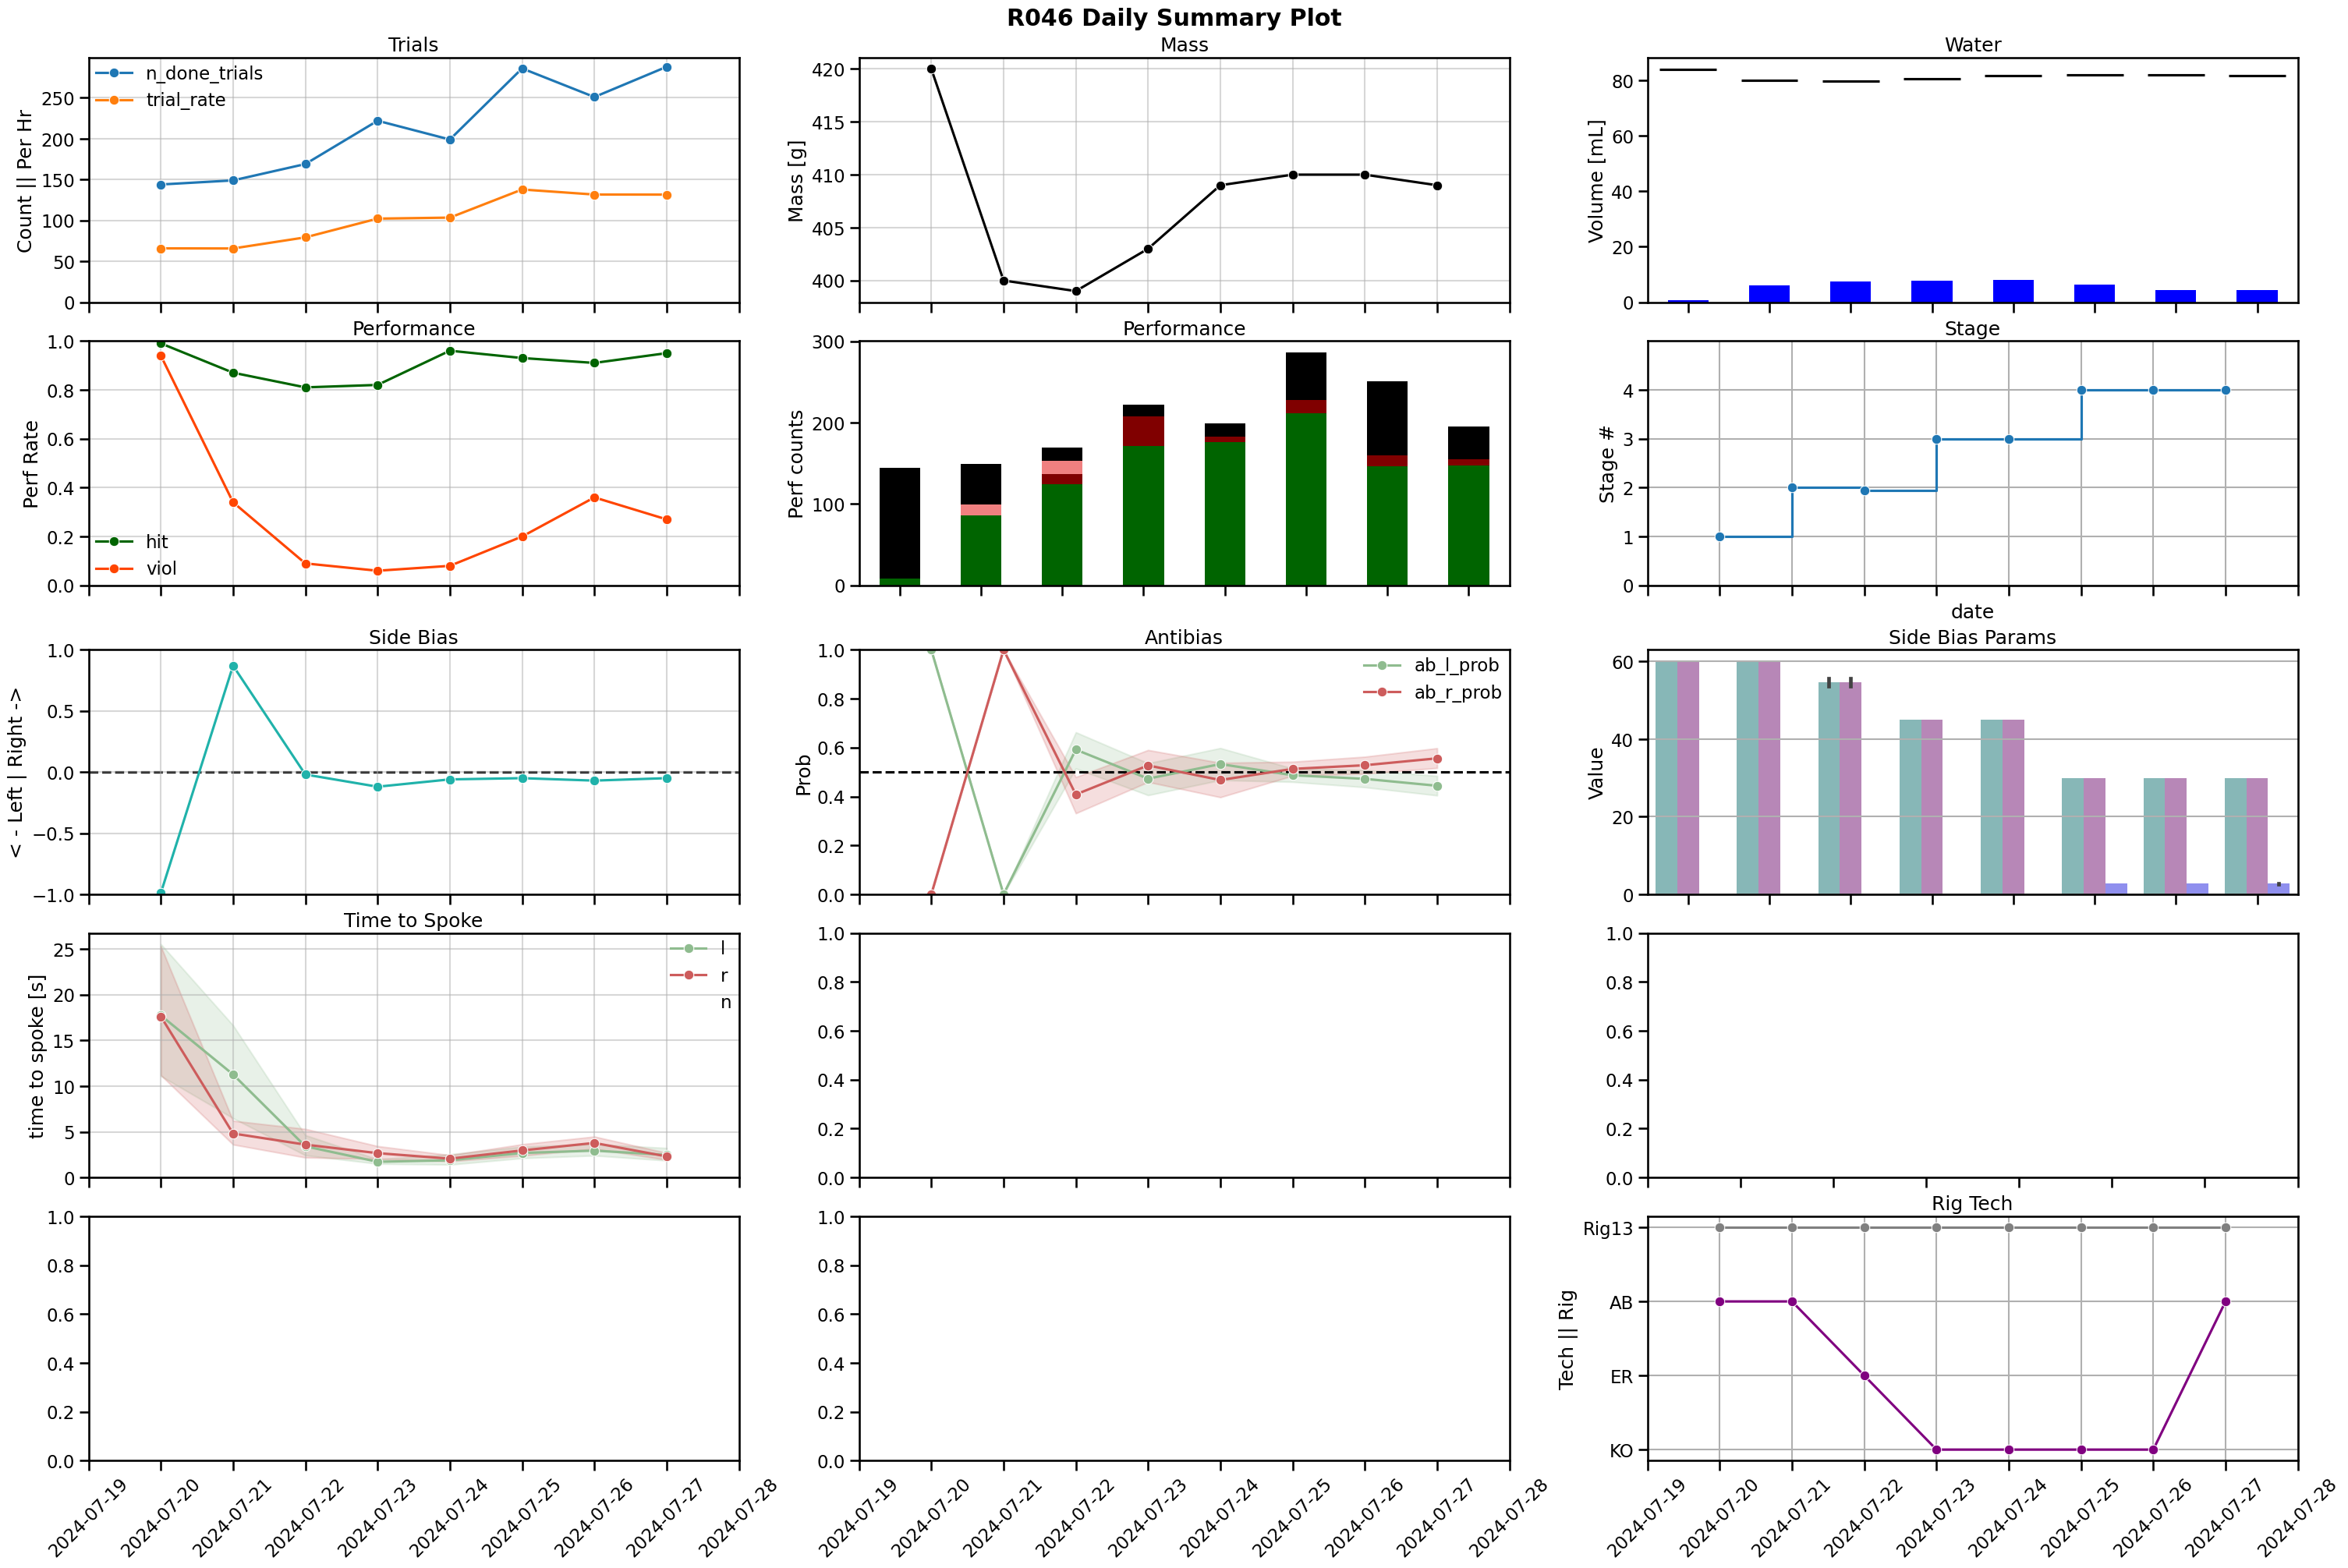

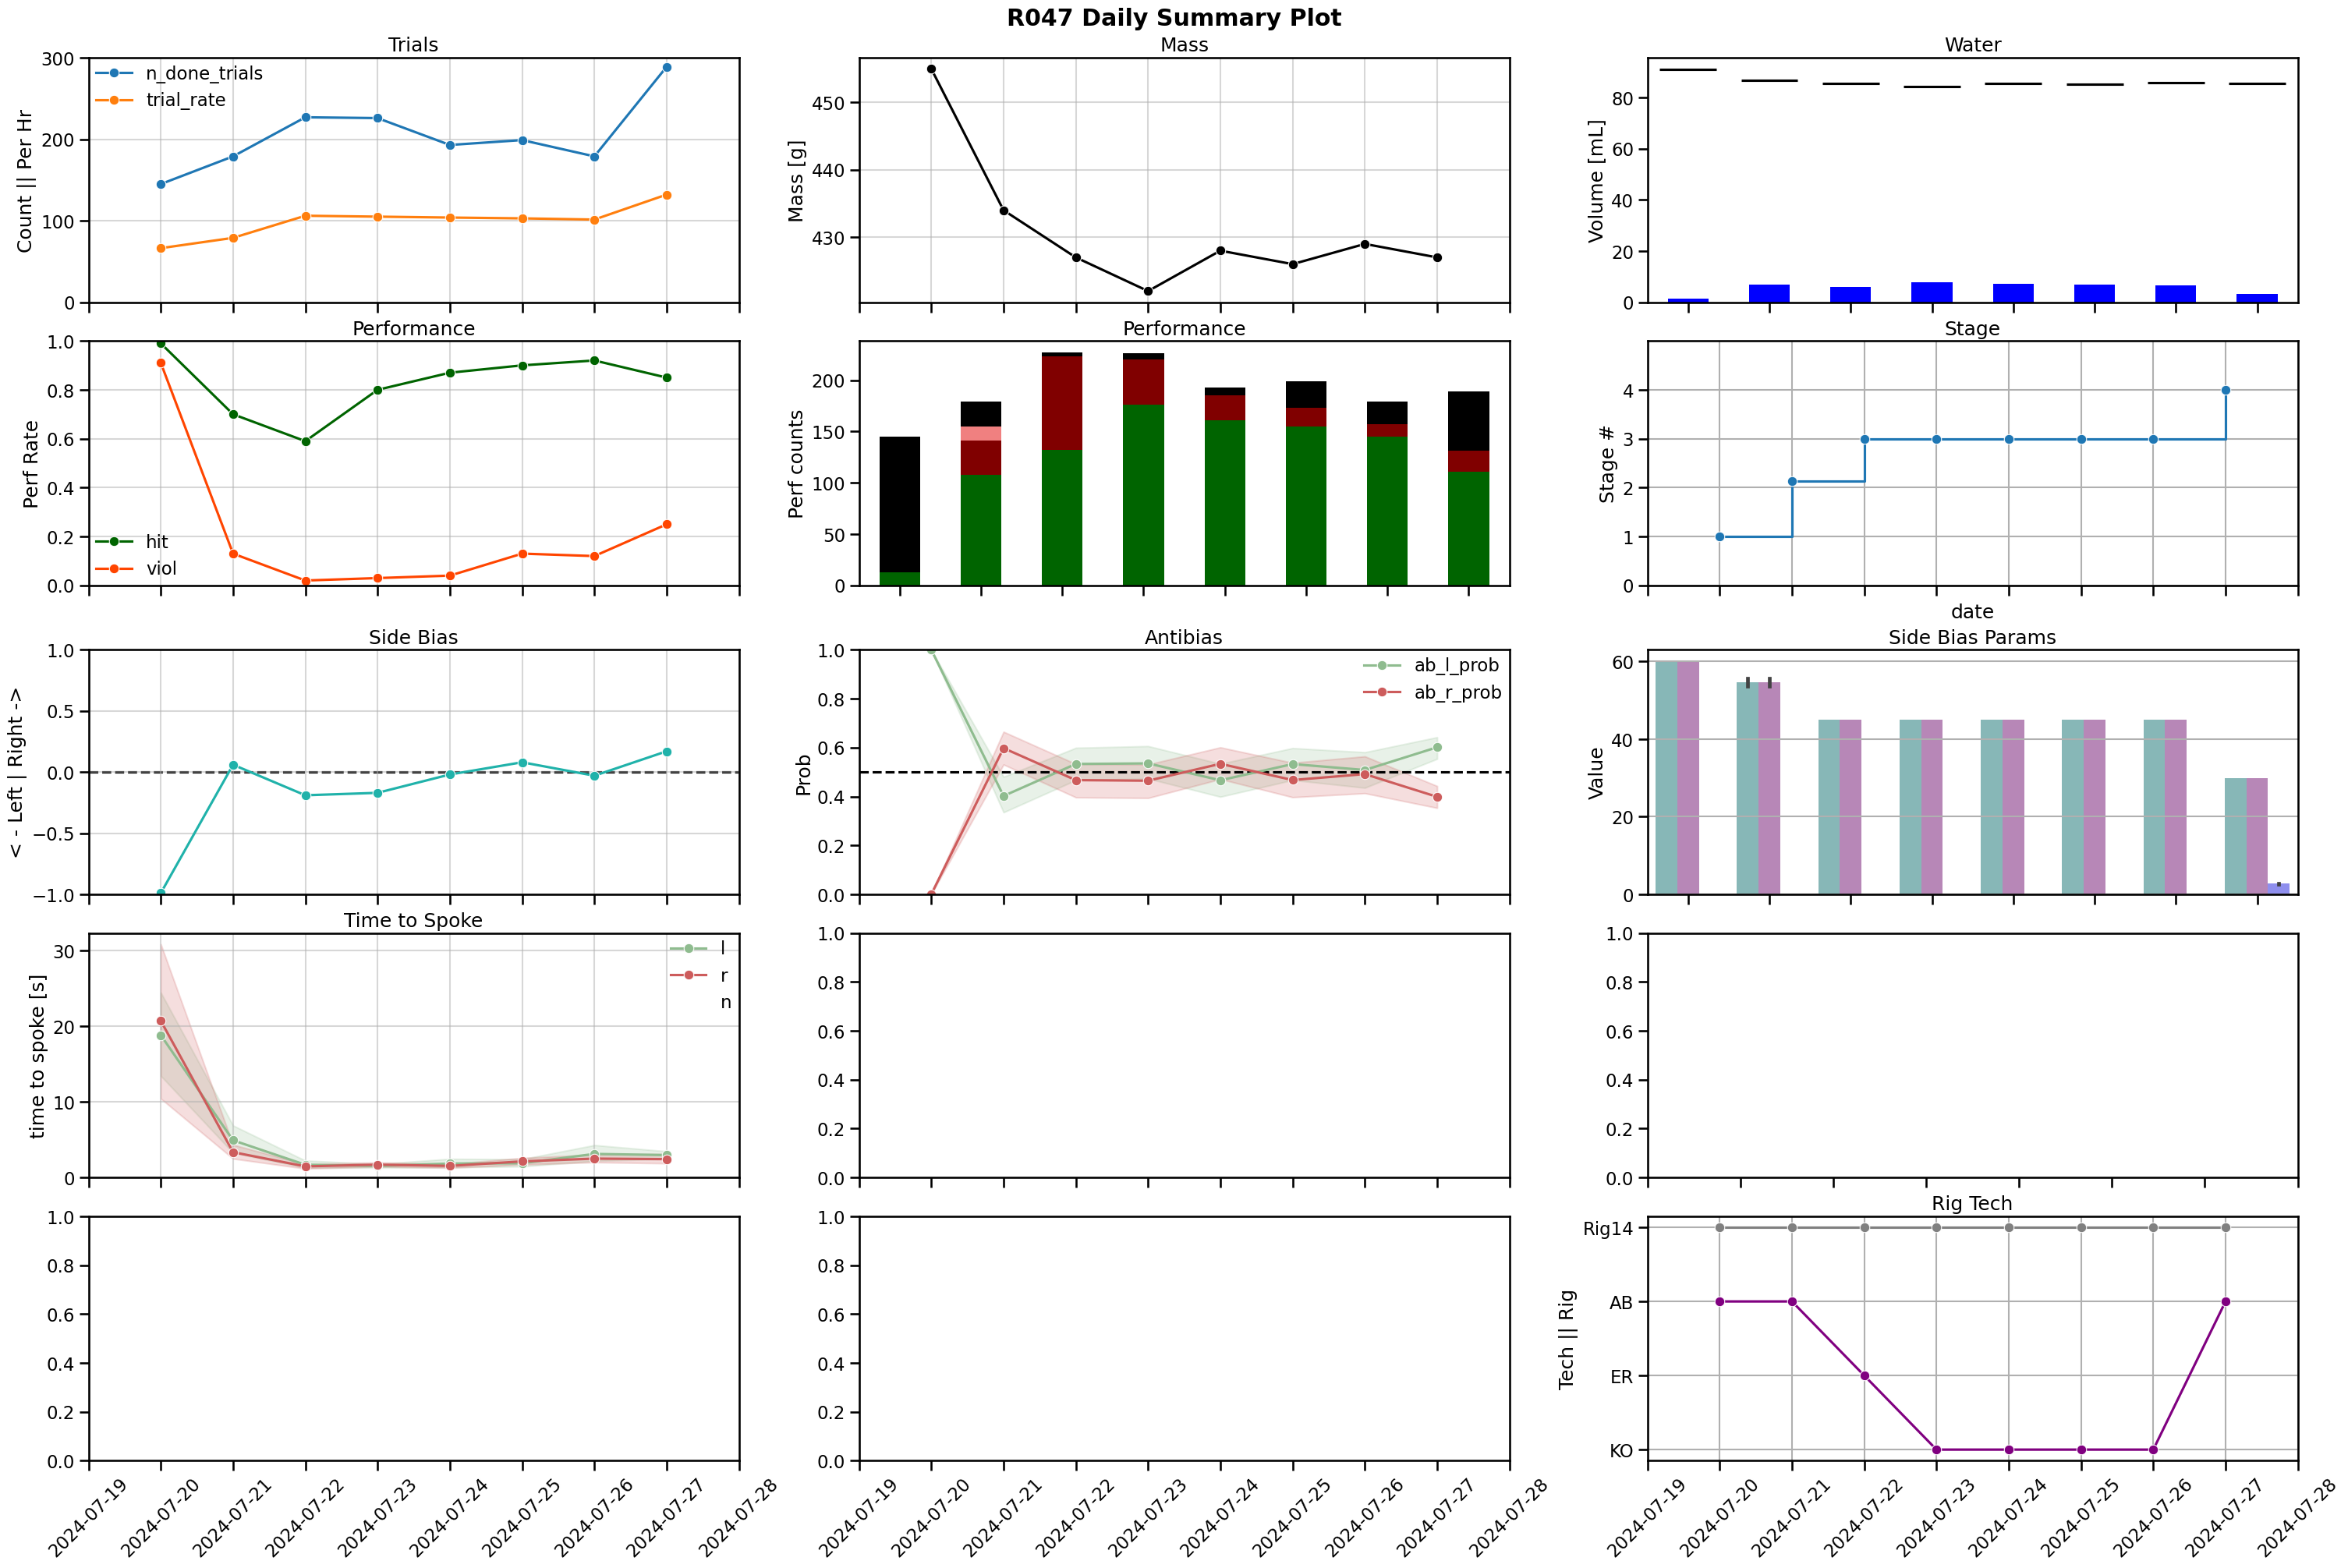

In [51]:
for animal_id, animal_days_df in days_df.query("animal_id in @ALPHA_1_ANIMALS").groupby(
    "animal_id"
):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

## Plot Within Day (Saved Out)

In [52]:
viz.summarize.single_day_summaries(
    trials_df.query("animal_id in @ALPHA_1_ANIMALS"),
    figures_path=FIGURES_PATH,
    save_out=True,
    overwrite=False,
)

making R040_2024-07-27_day_summary
R040 2024-07-27 spoke only stage
making R041_2024-07-27_day_summary
R041 2024-07-27 spoke only stage
making R042_2024-07-27_day_summary
R042 2024-07-27 spoke only stage
making R043_2024-07-27_day_summary
R043 2024-07-27 spoke only stage
making R044_2024-07-27_day_summary
R044 2024-07-27 spoke only stage
making R046_2024-07-27_day_summary
R046 2024-07-27 spoke only stage
making R047_2024-07-27_day_summary
R047 2024-07-27 spoke only stage


---
# Alpha 2s

These animals started later and some run in session 6 while others run in session 7

## Session 6 animals Plot over Days






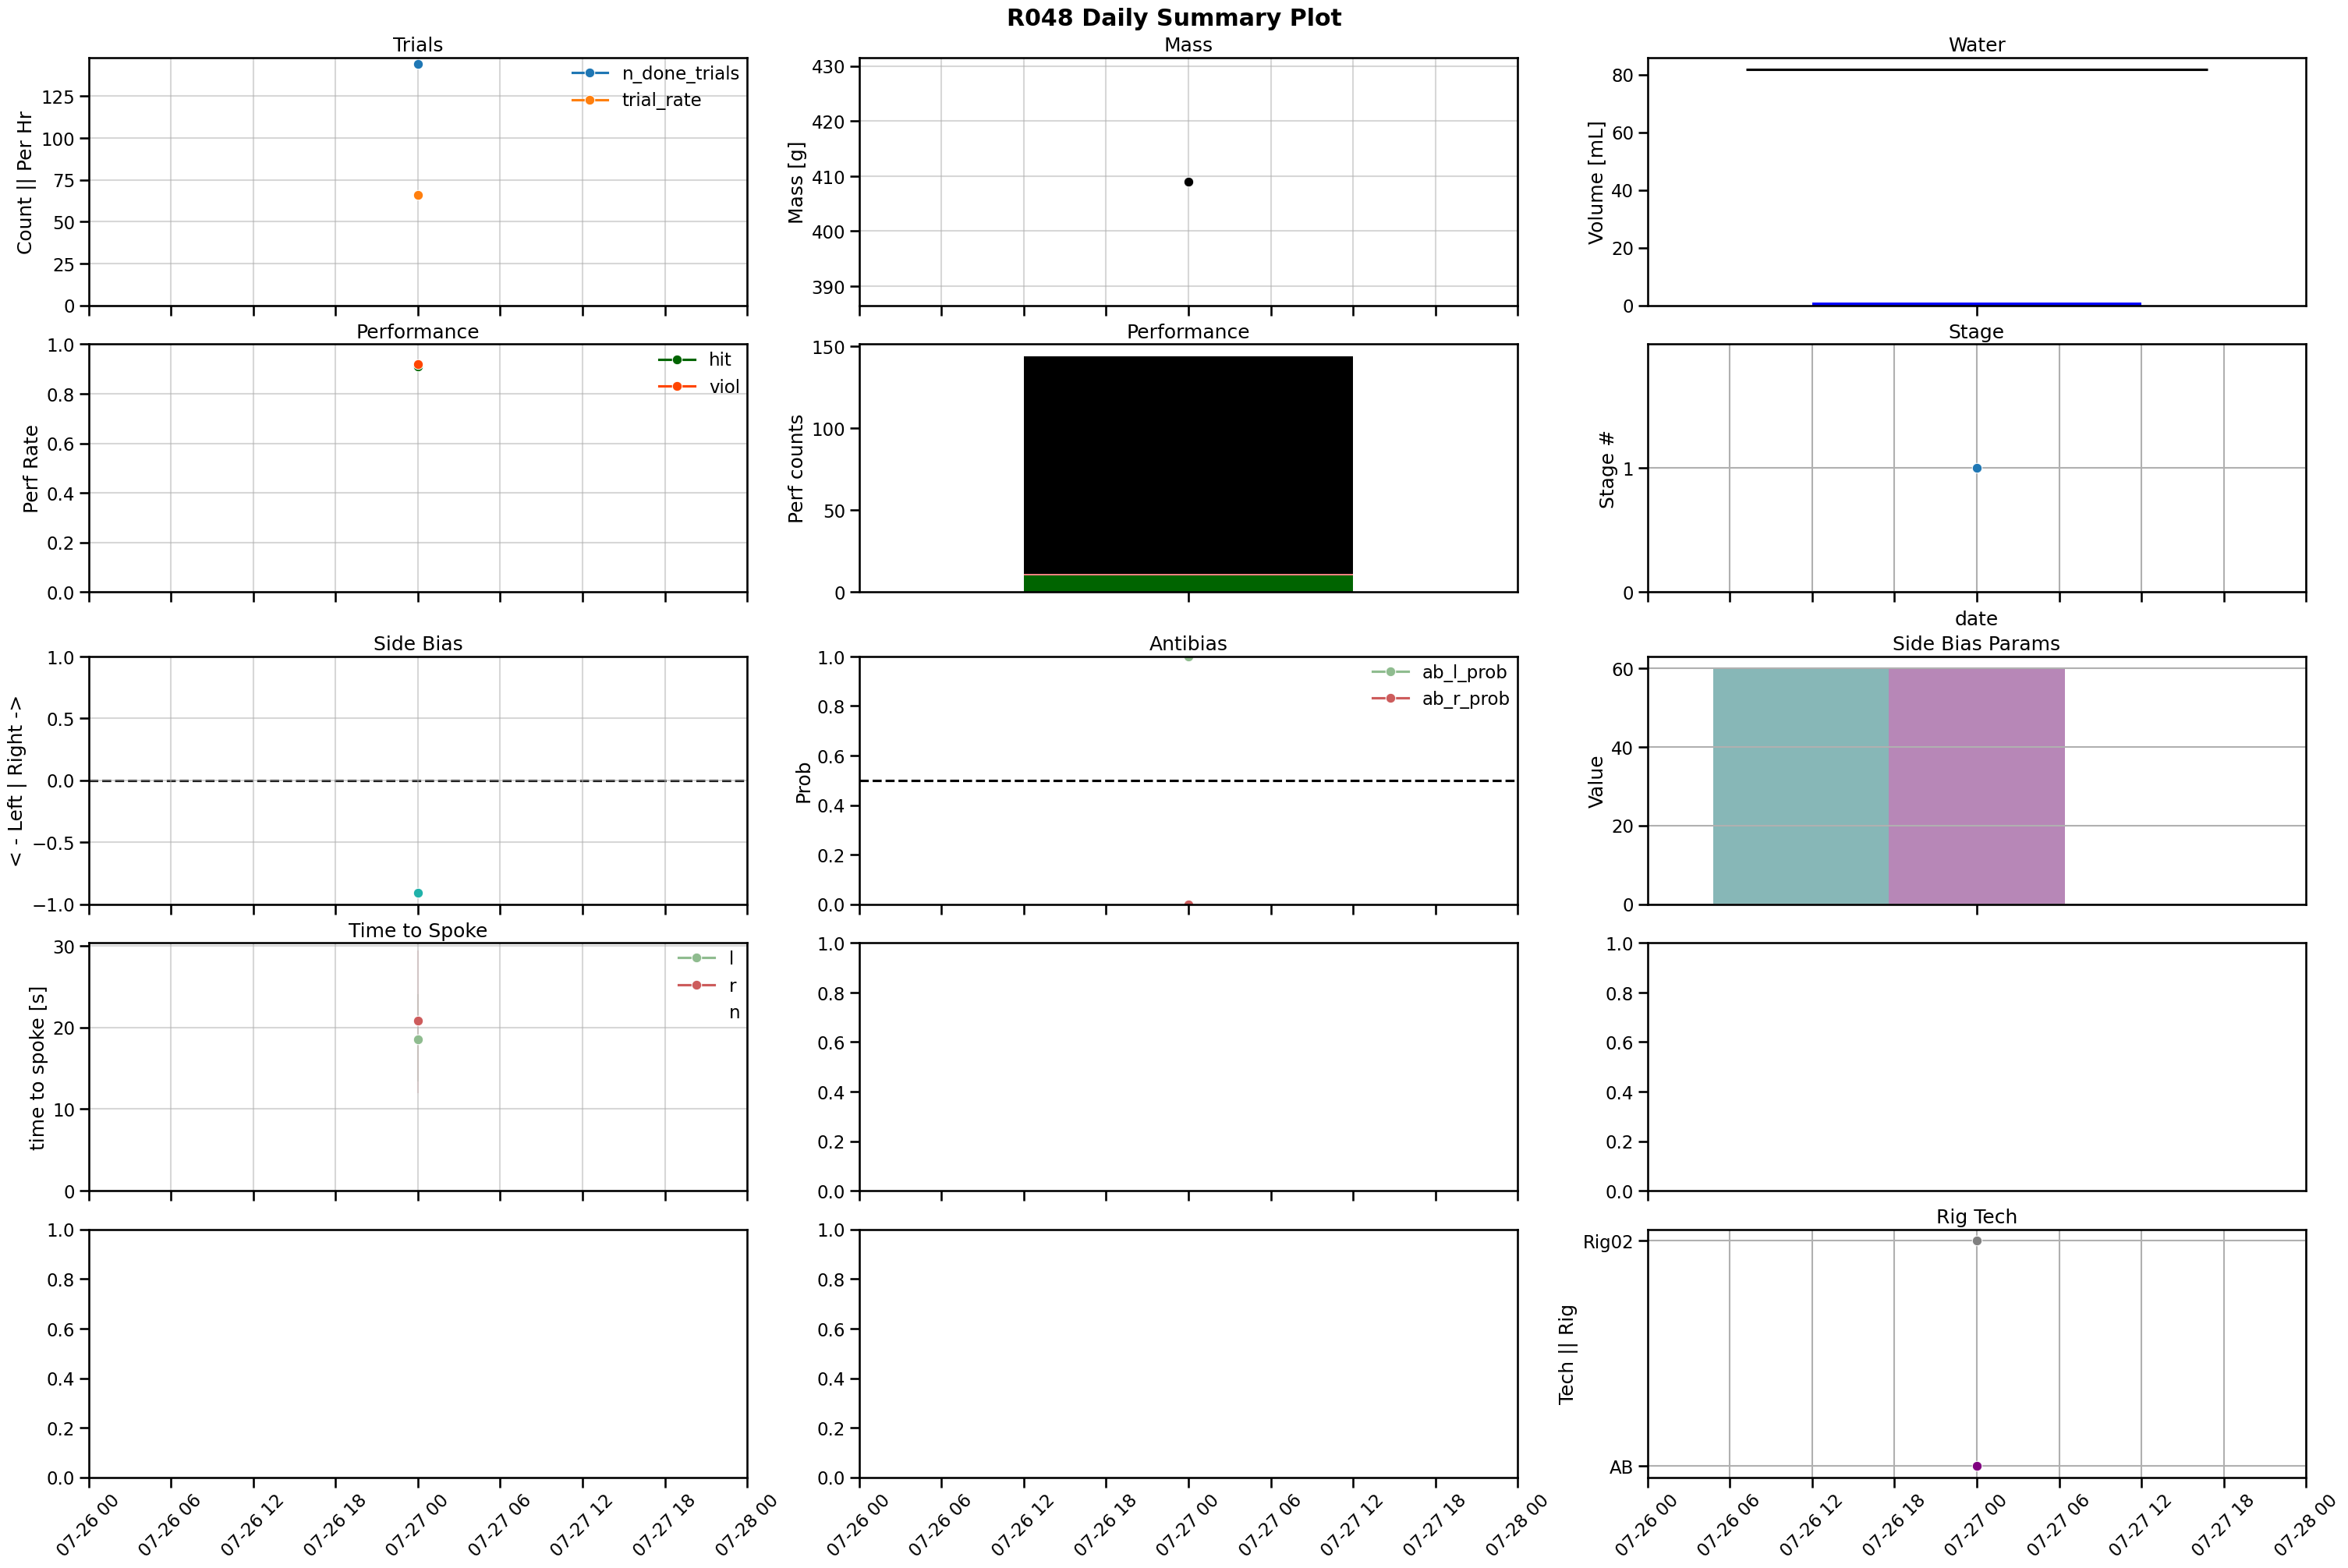

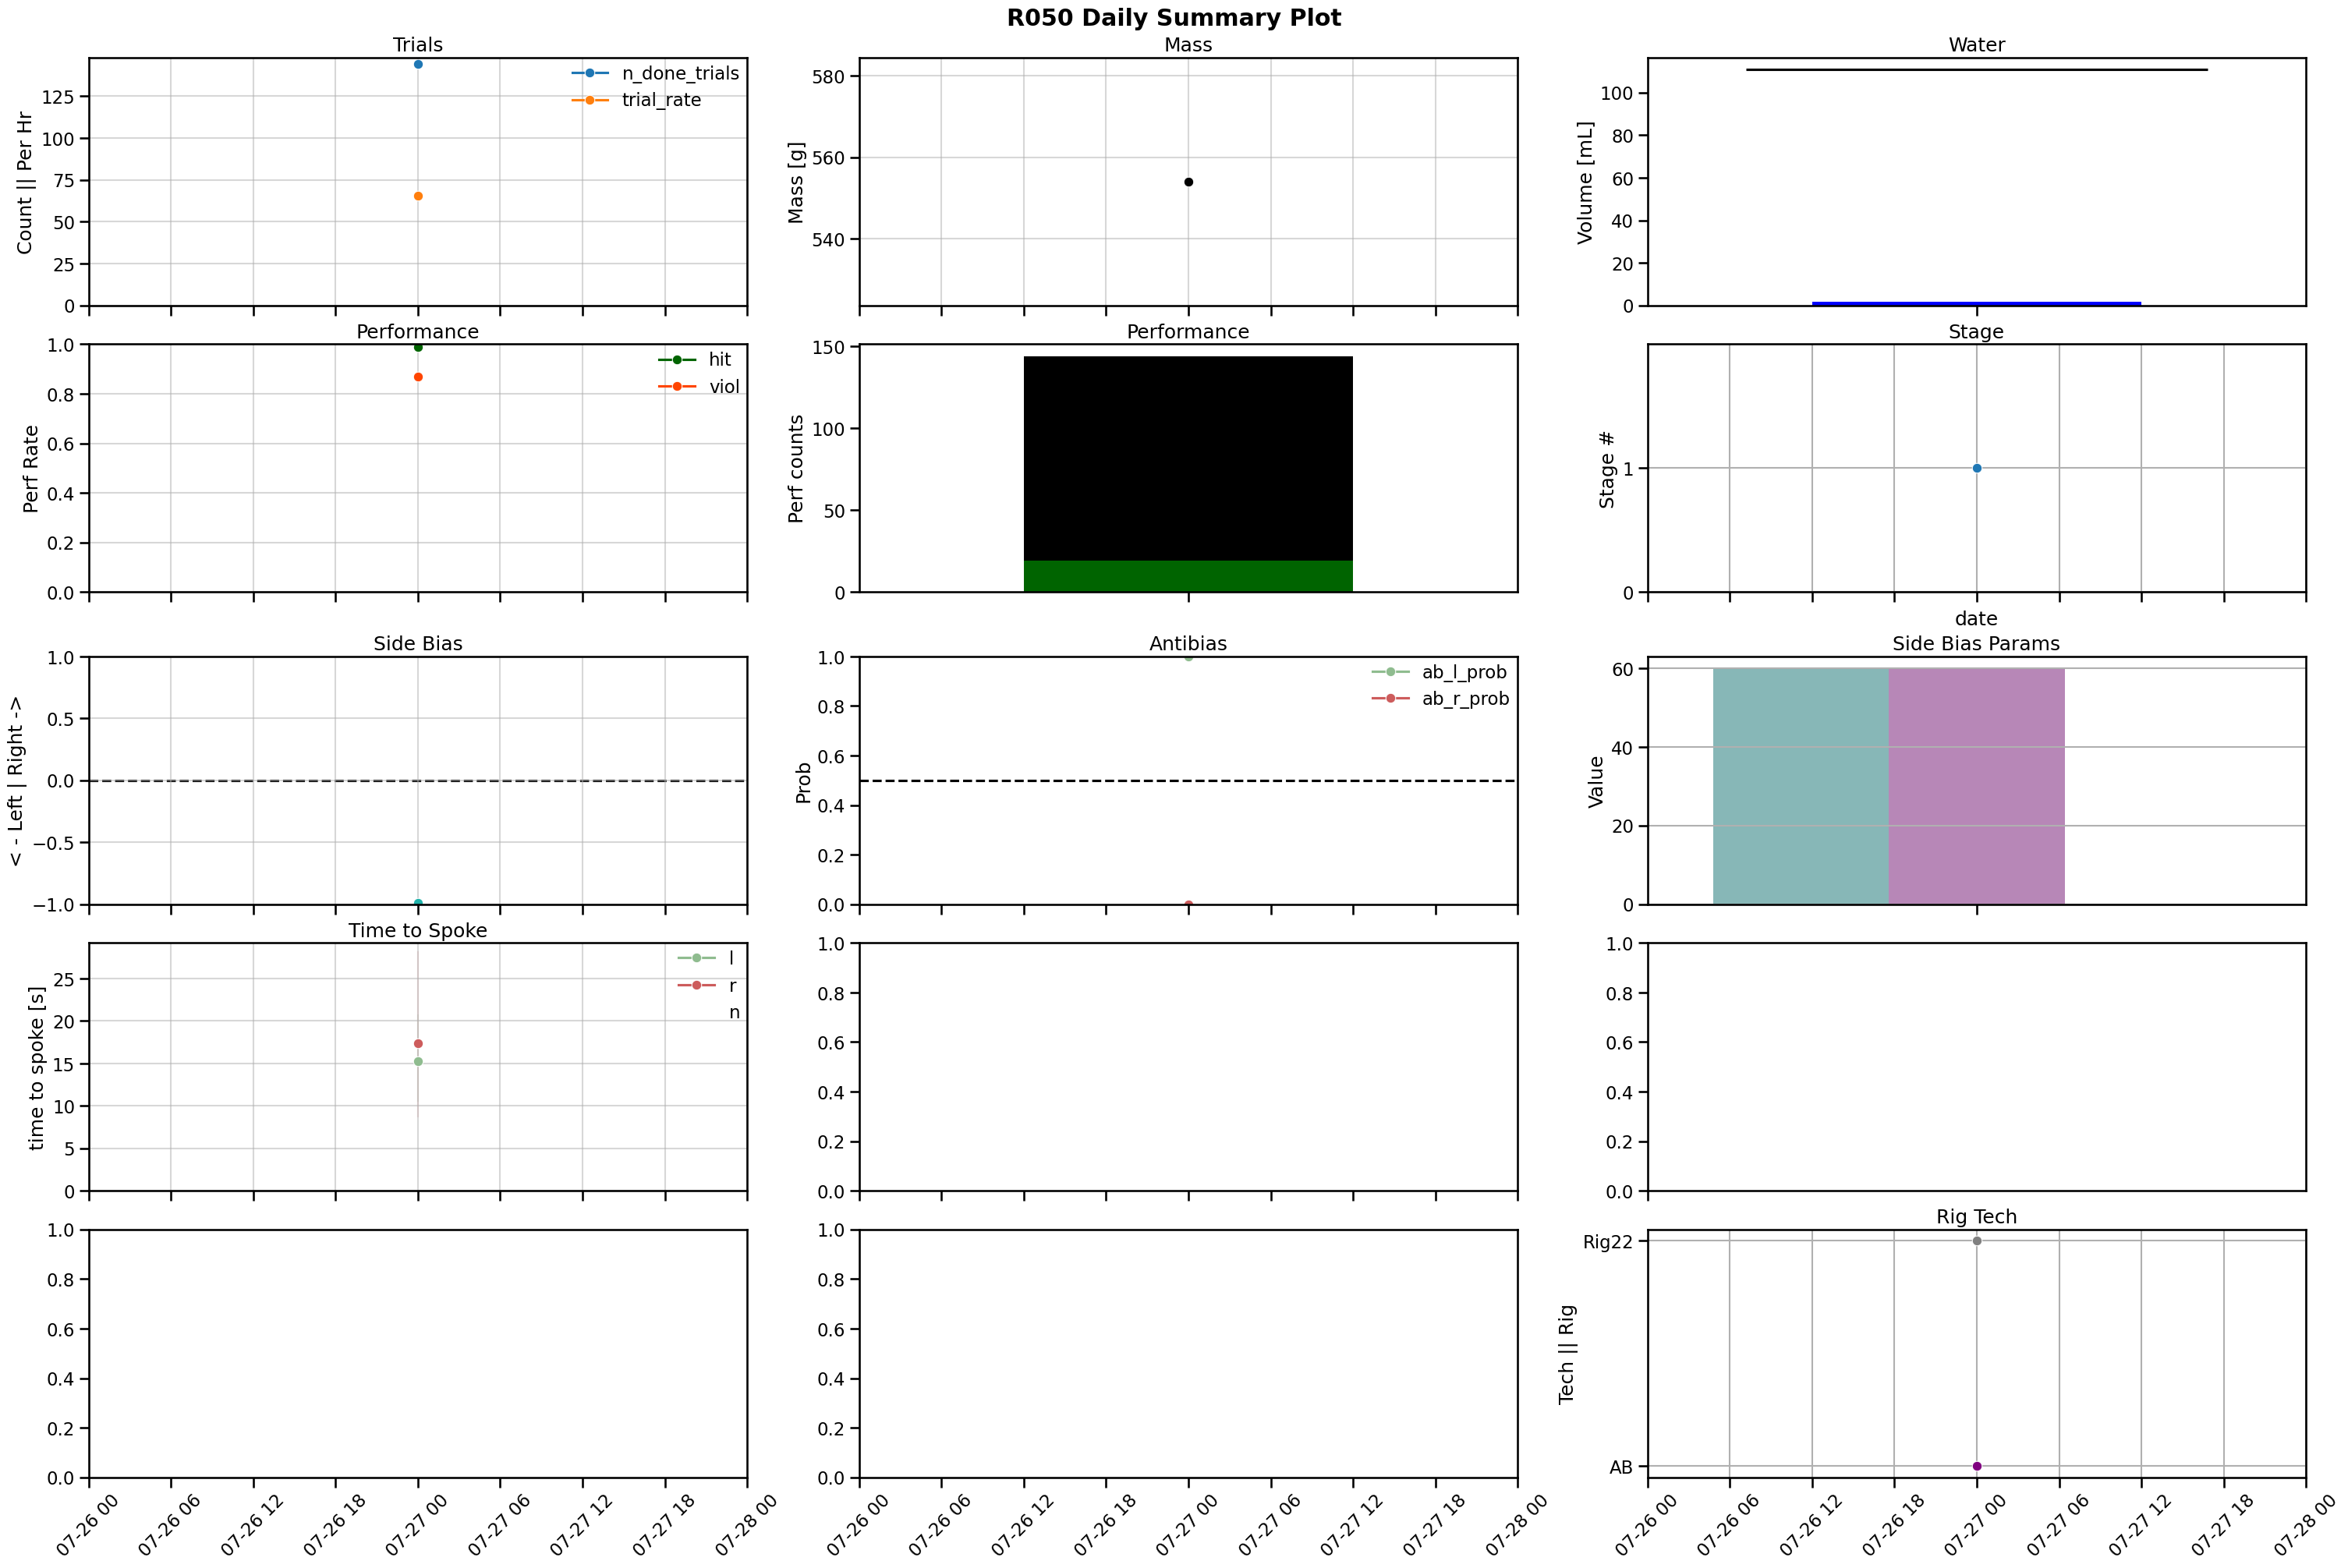

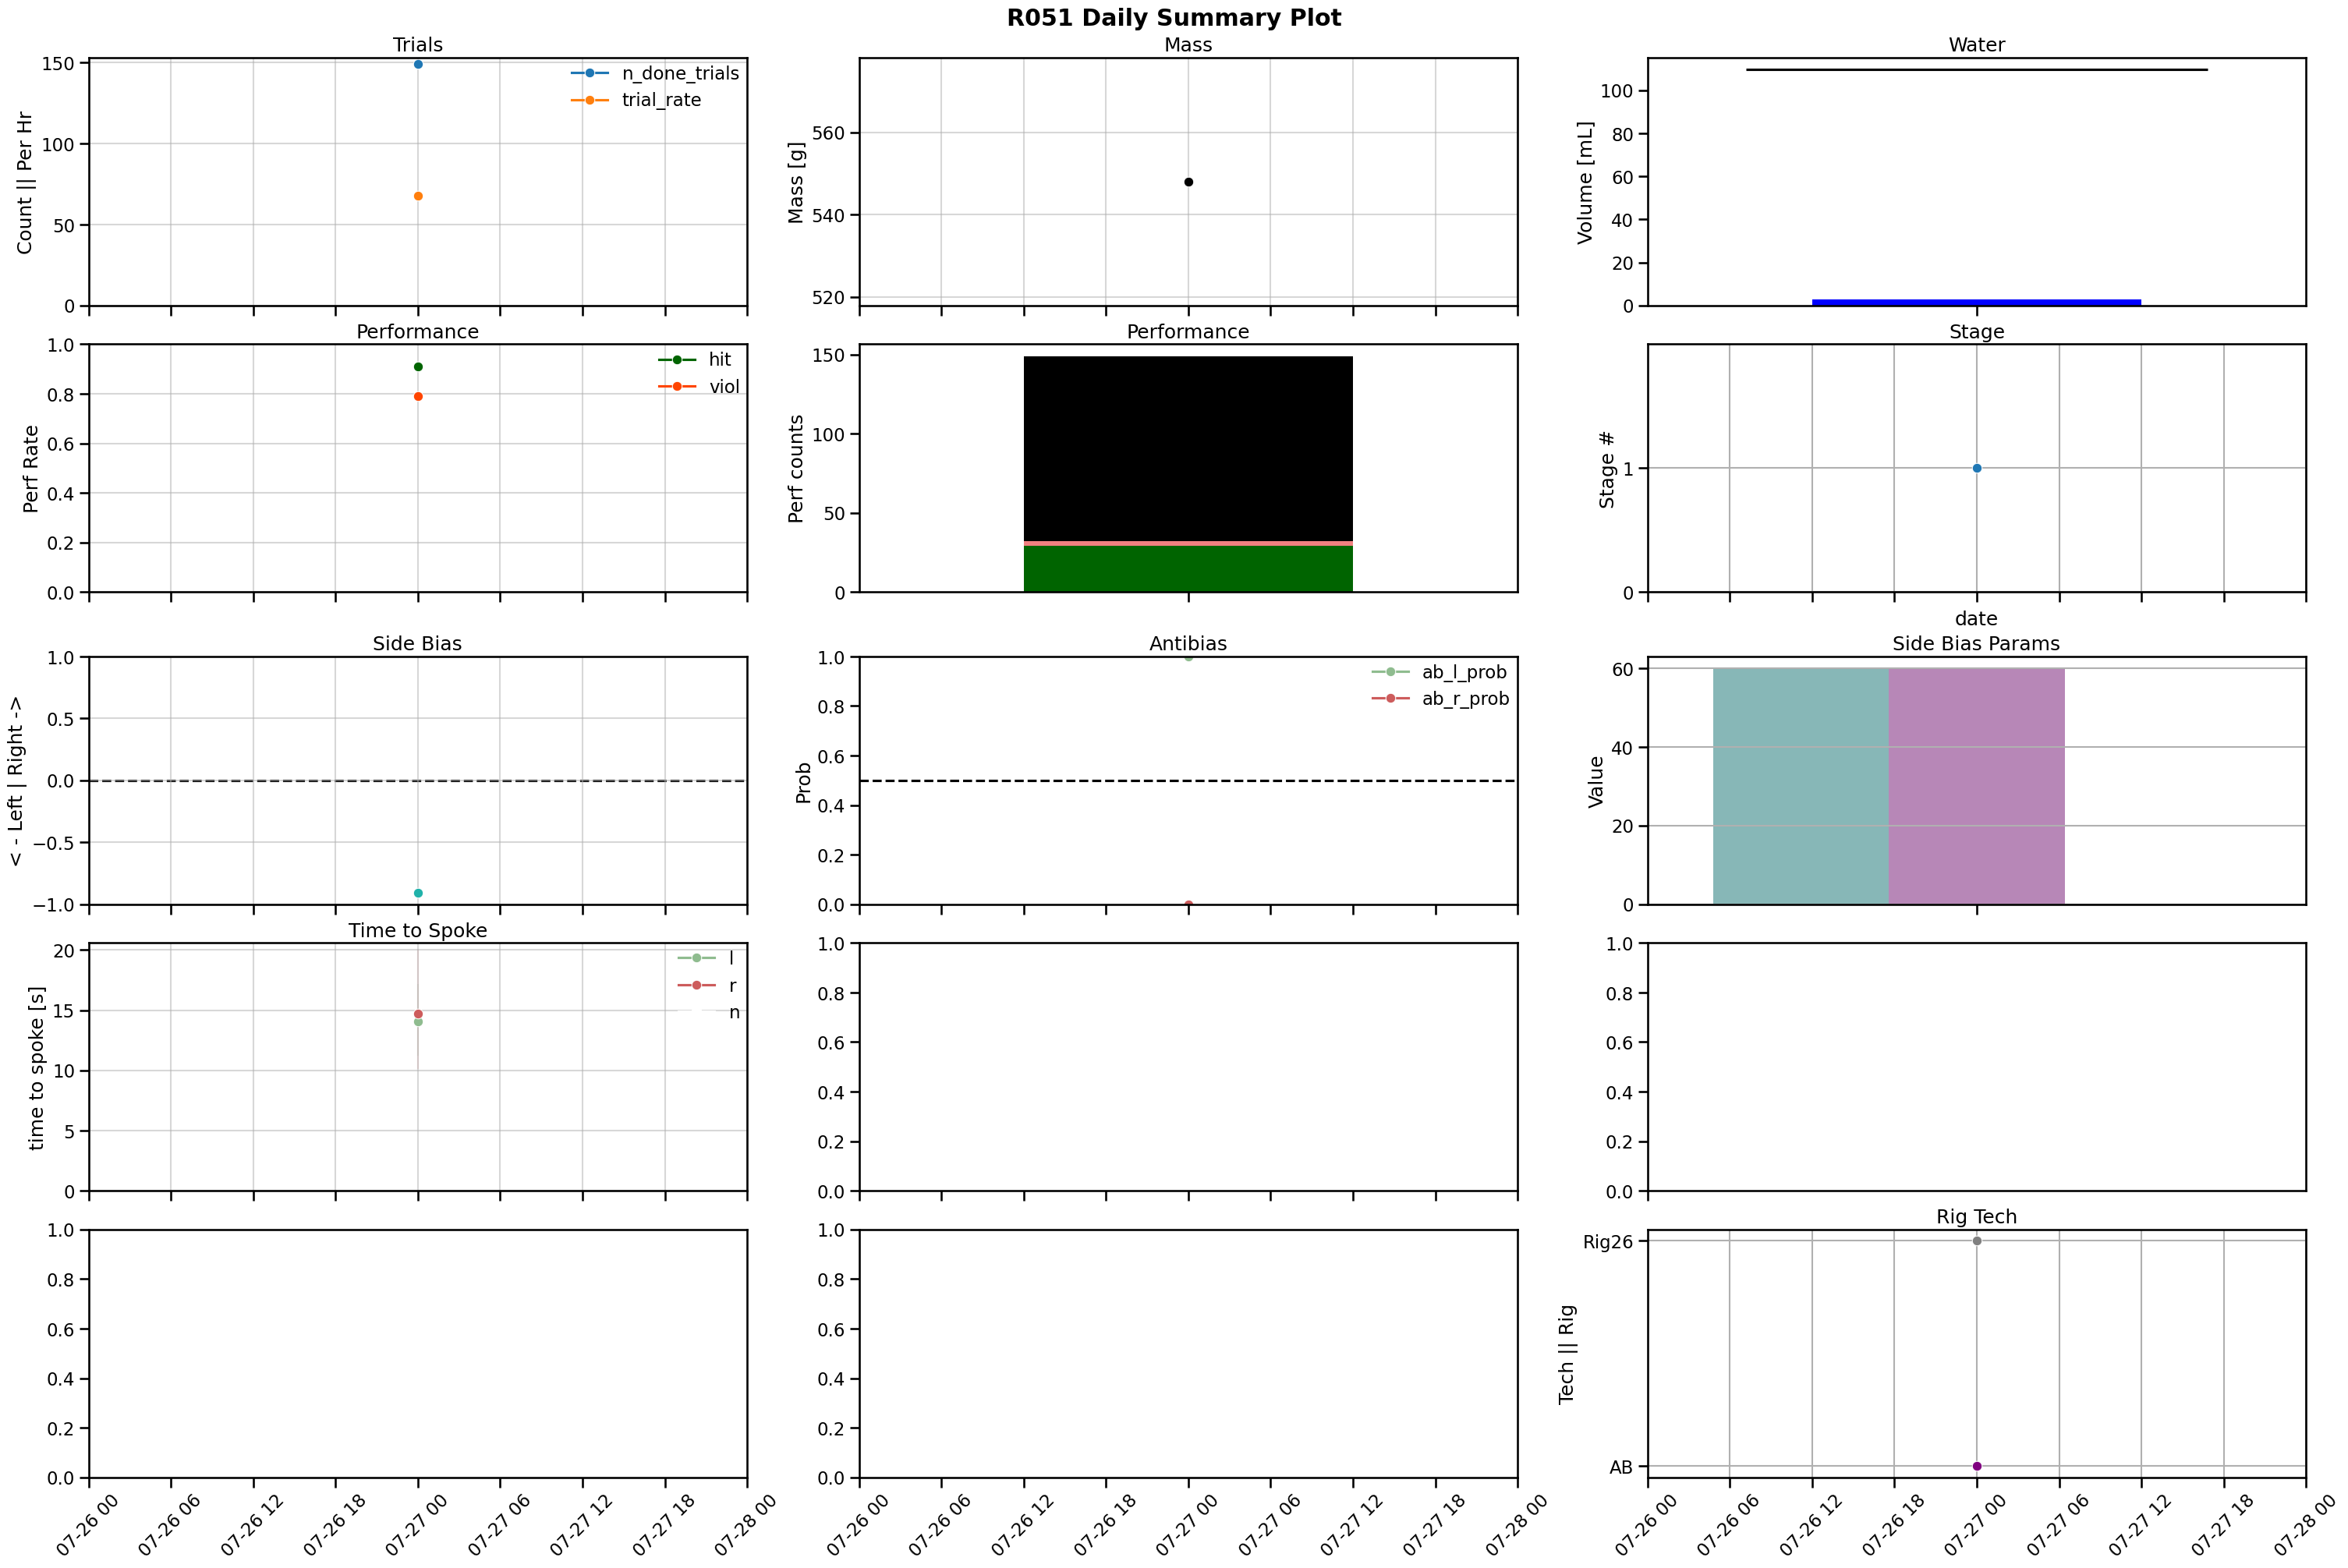

In [53]:
# ALPHA_2_SESSION_6 = set(ALPHA_2_ANIMALS) & set(ALPHA_SESSION_6)
for animal_id, animal_days_df in days_df.query(
    "animal_id in @ALPHA_2_ANIMALS and animal_id in @ALPHA_SESSION_6"
).groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

## Session 6 animals Plot Within Day (Saved Out)

In [54]:
viz.summarize.single_day_summaries(
    trials_df.query("animal_id in @ALPHA_2_ANIMALS and animal_id in @ALPHA_SESSION_6"),
    figures_path=FIGURES_PATH,
    save_out=True,
    overwrite=False,
)

making R048_2024-07-27_day_summary
R048 2024-07-27 spoke only stage
making R050_2024-07-27_day_summary
R050 2024-07-27 spoke only stage
making R051_2024-07-27_day_summary
R051 2024-07-27 spoke only stage


---
## Session 7 animals Plot over Days

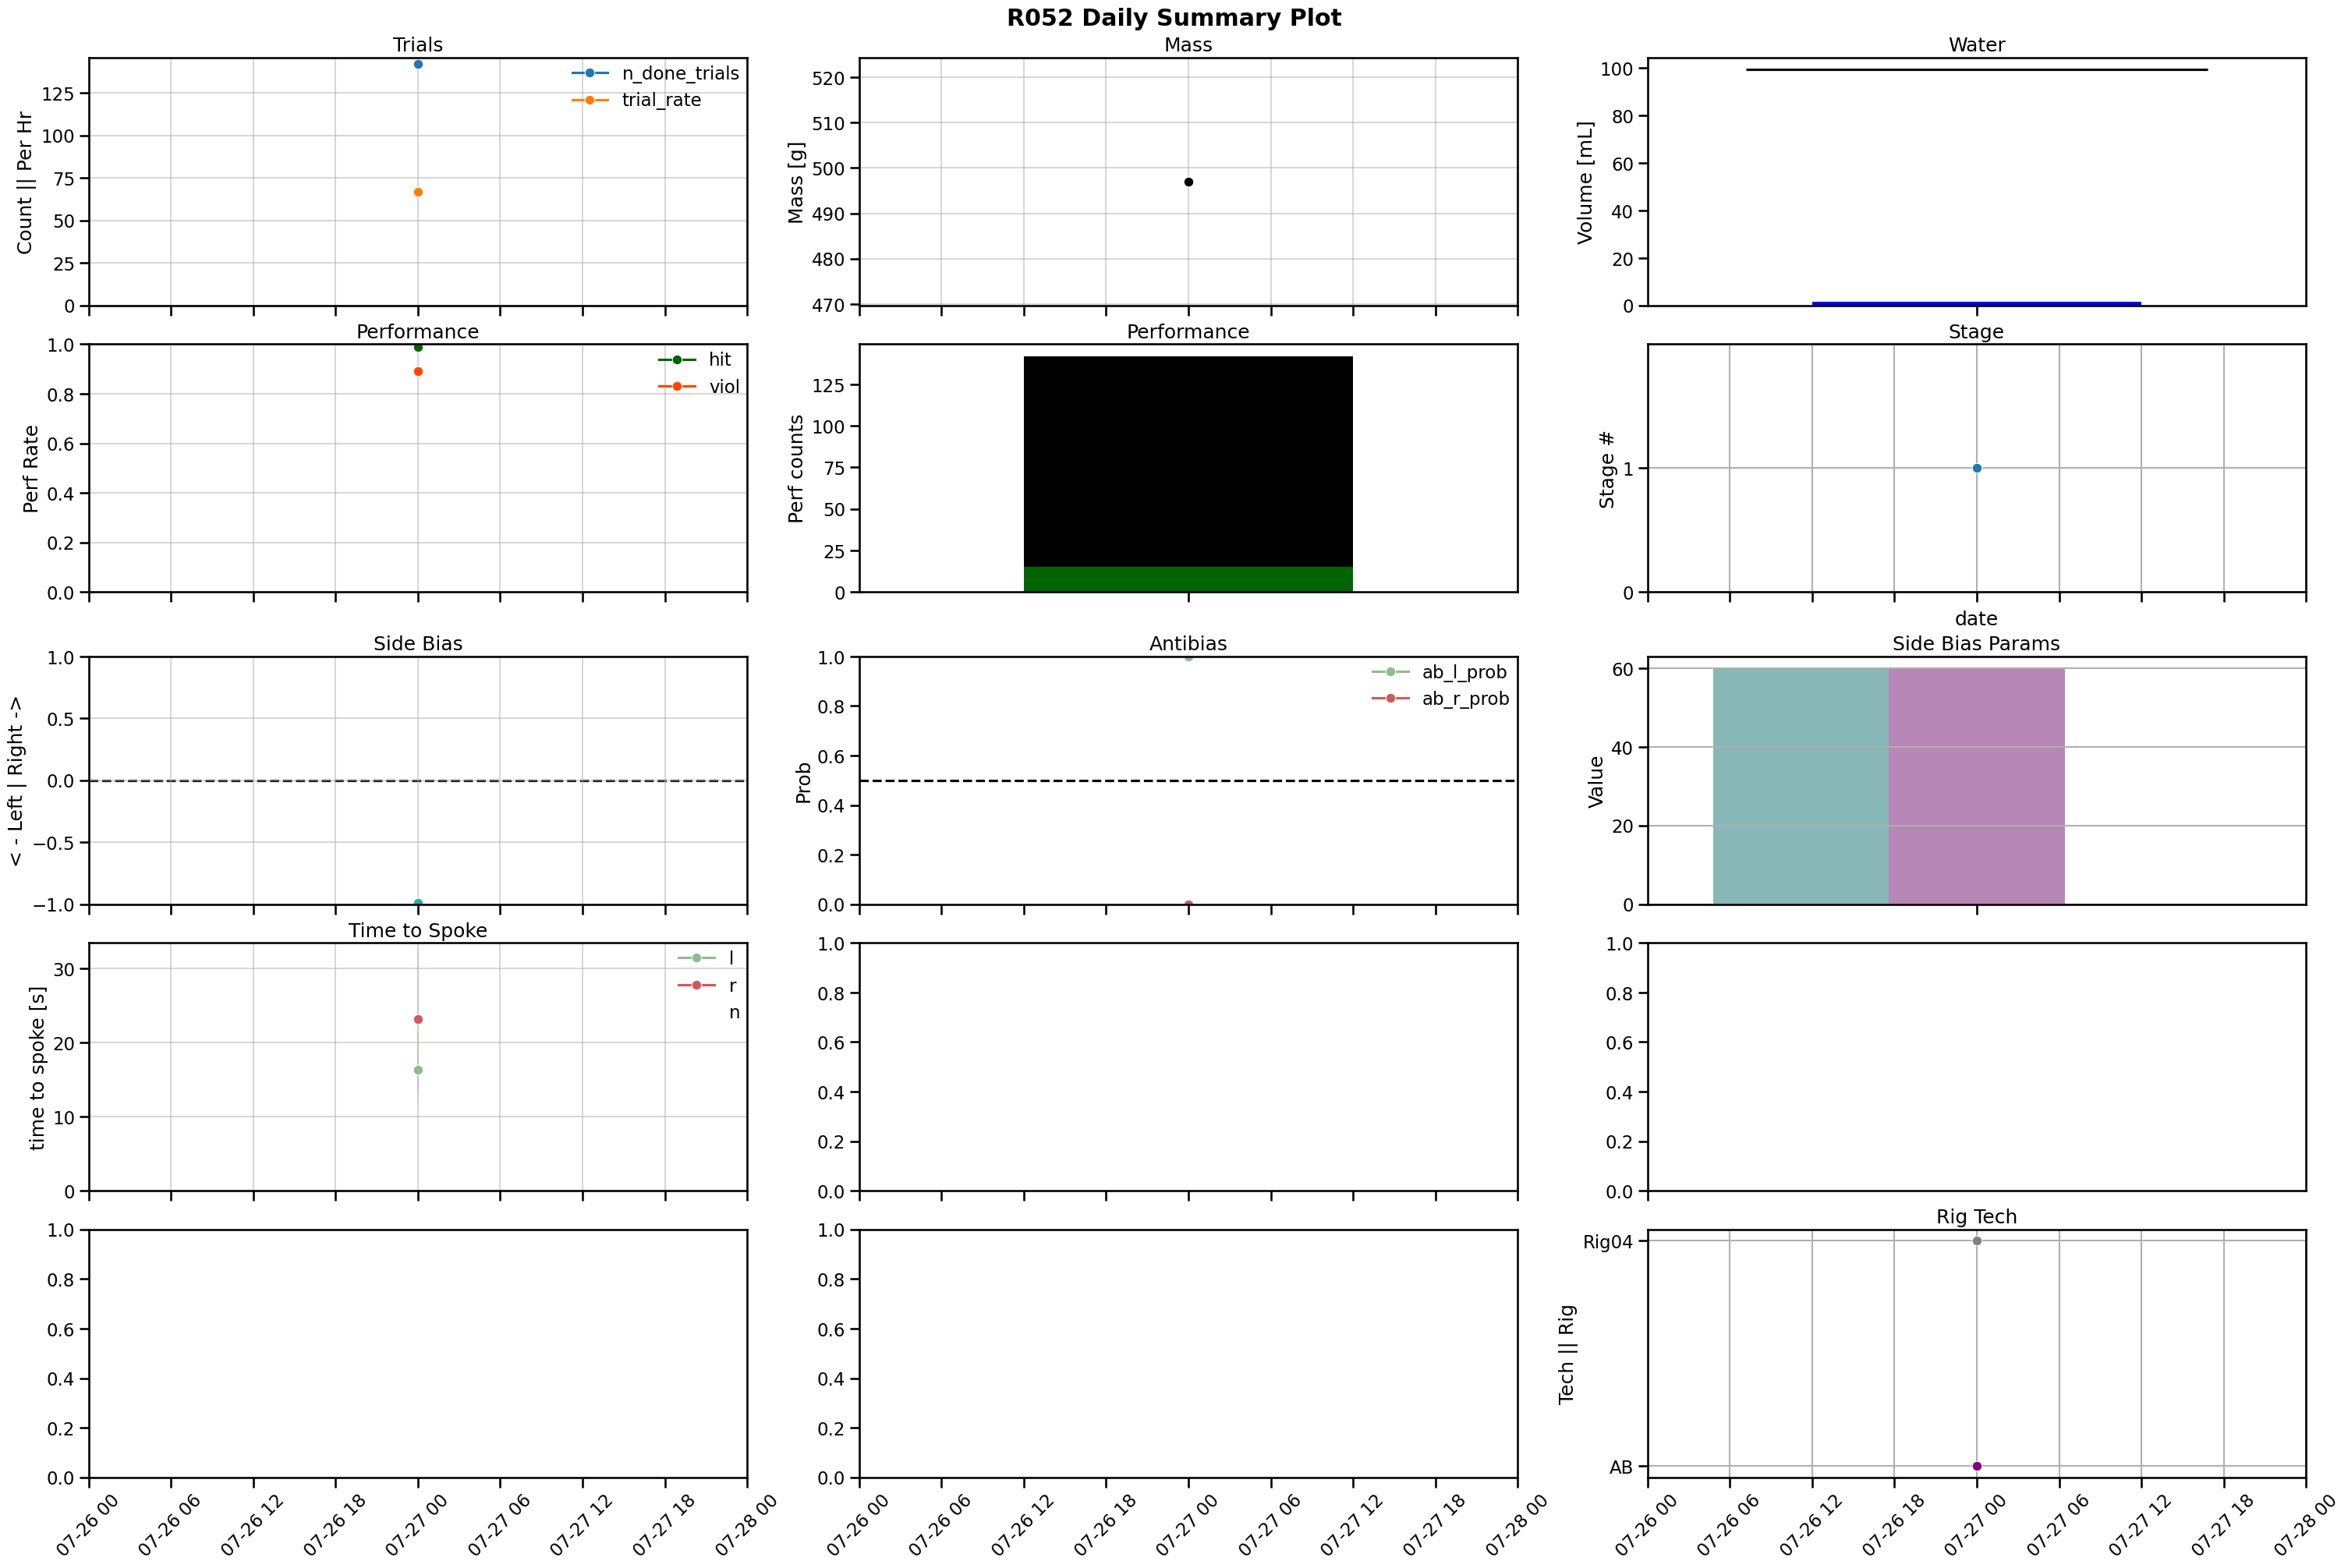

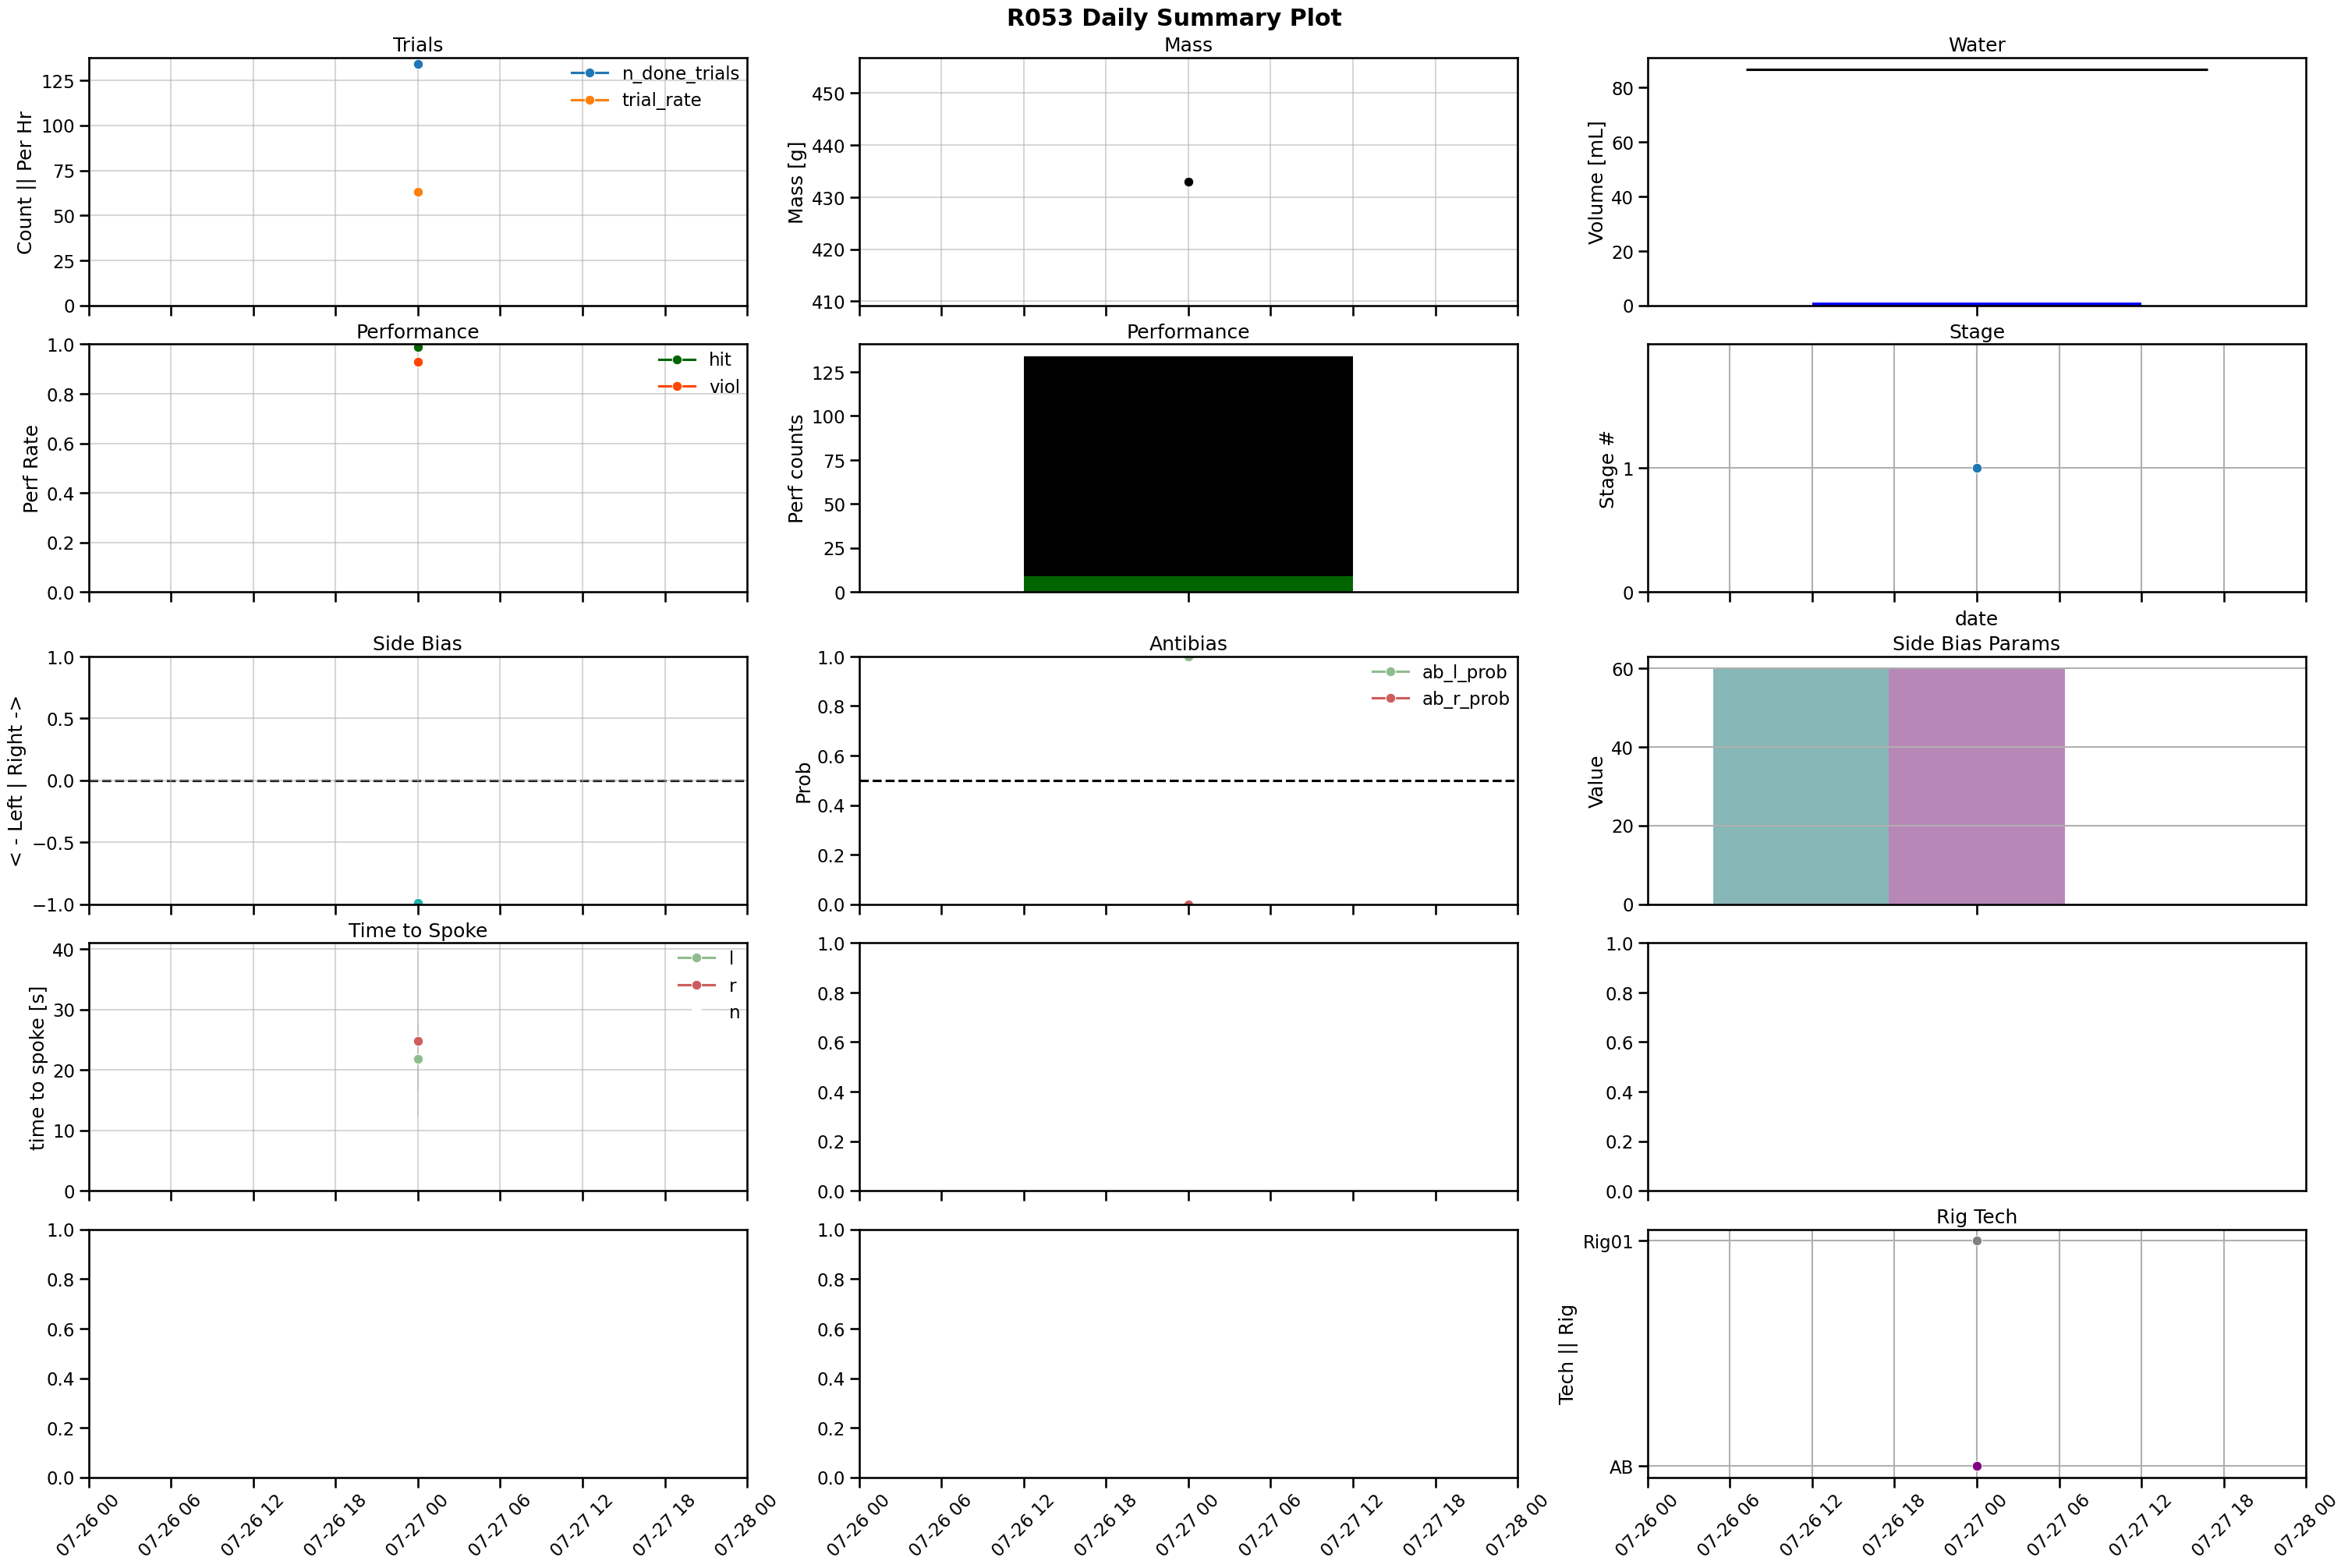

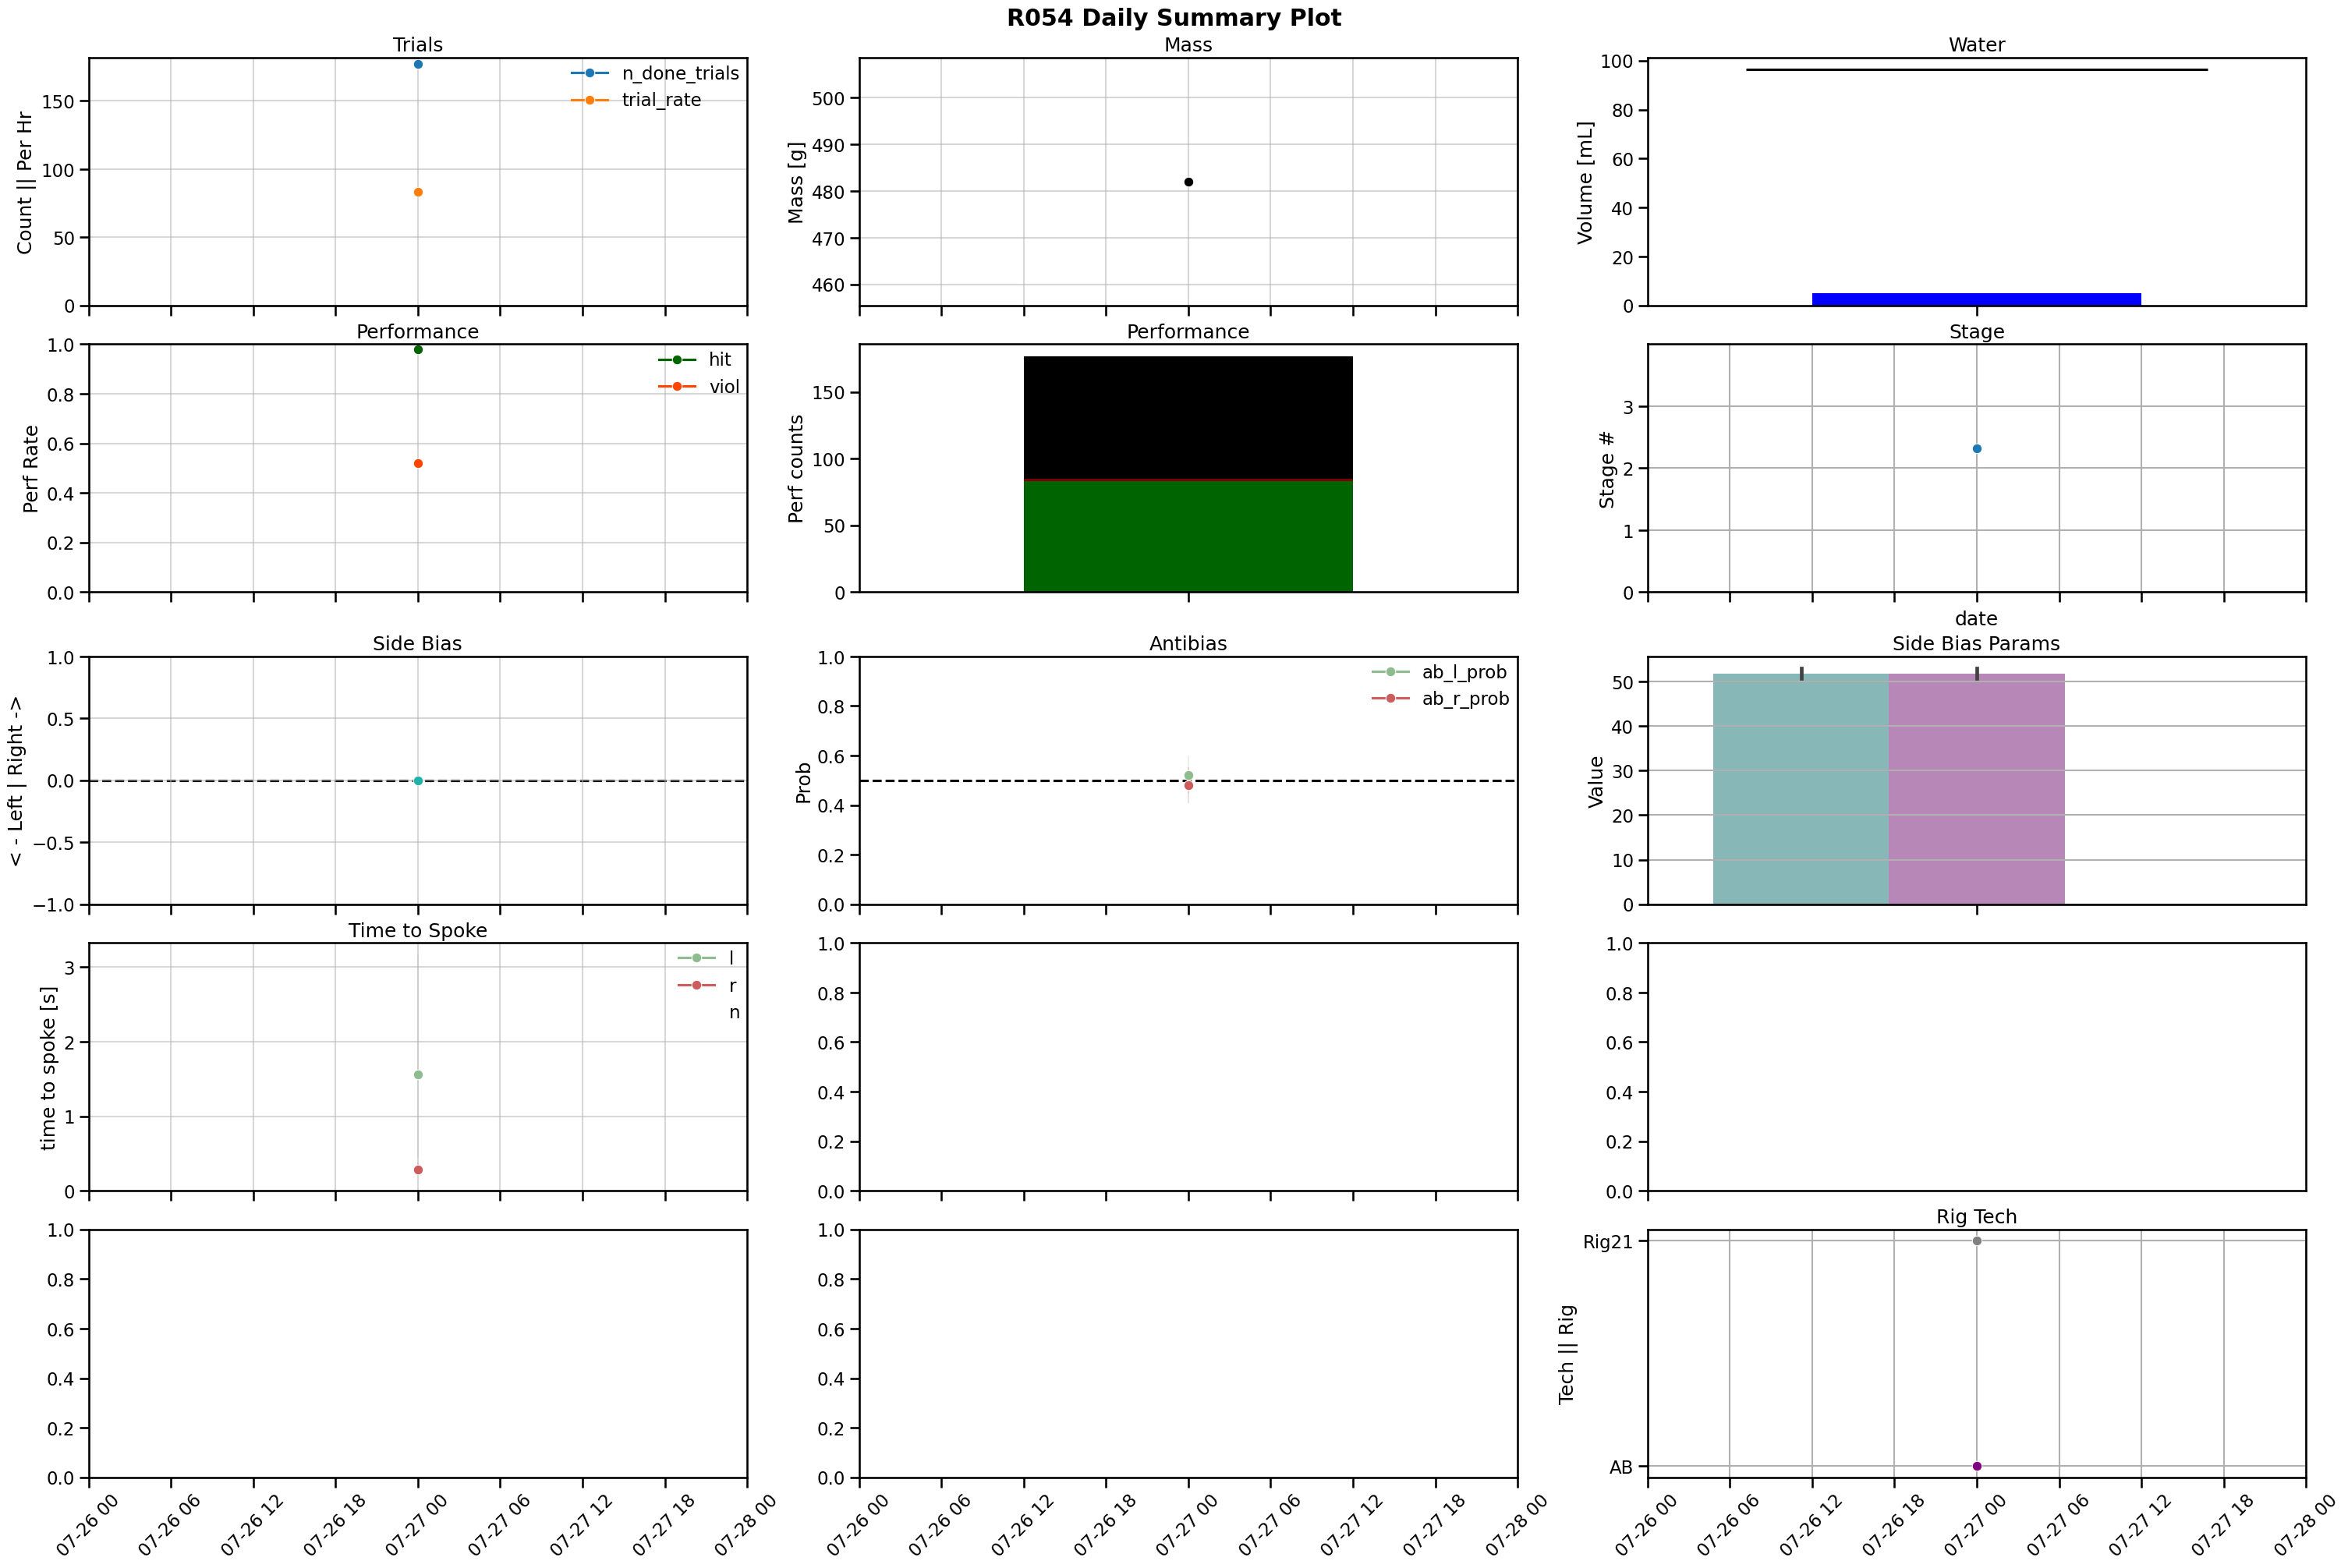

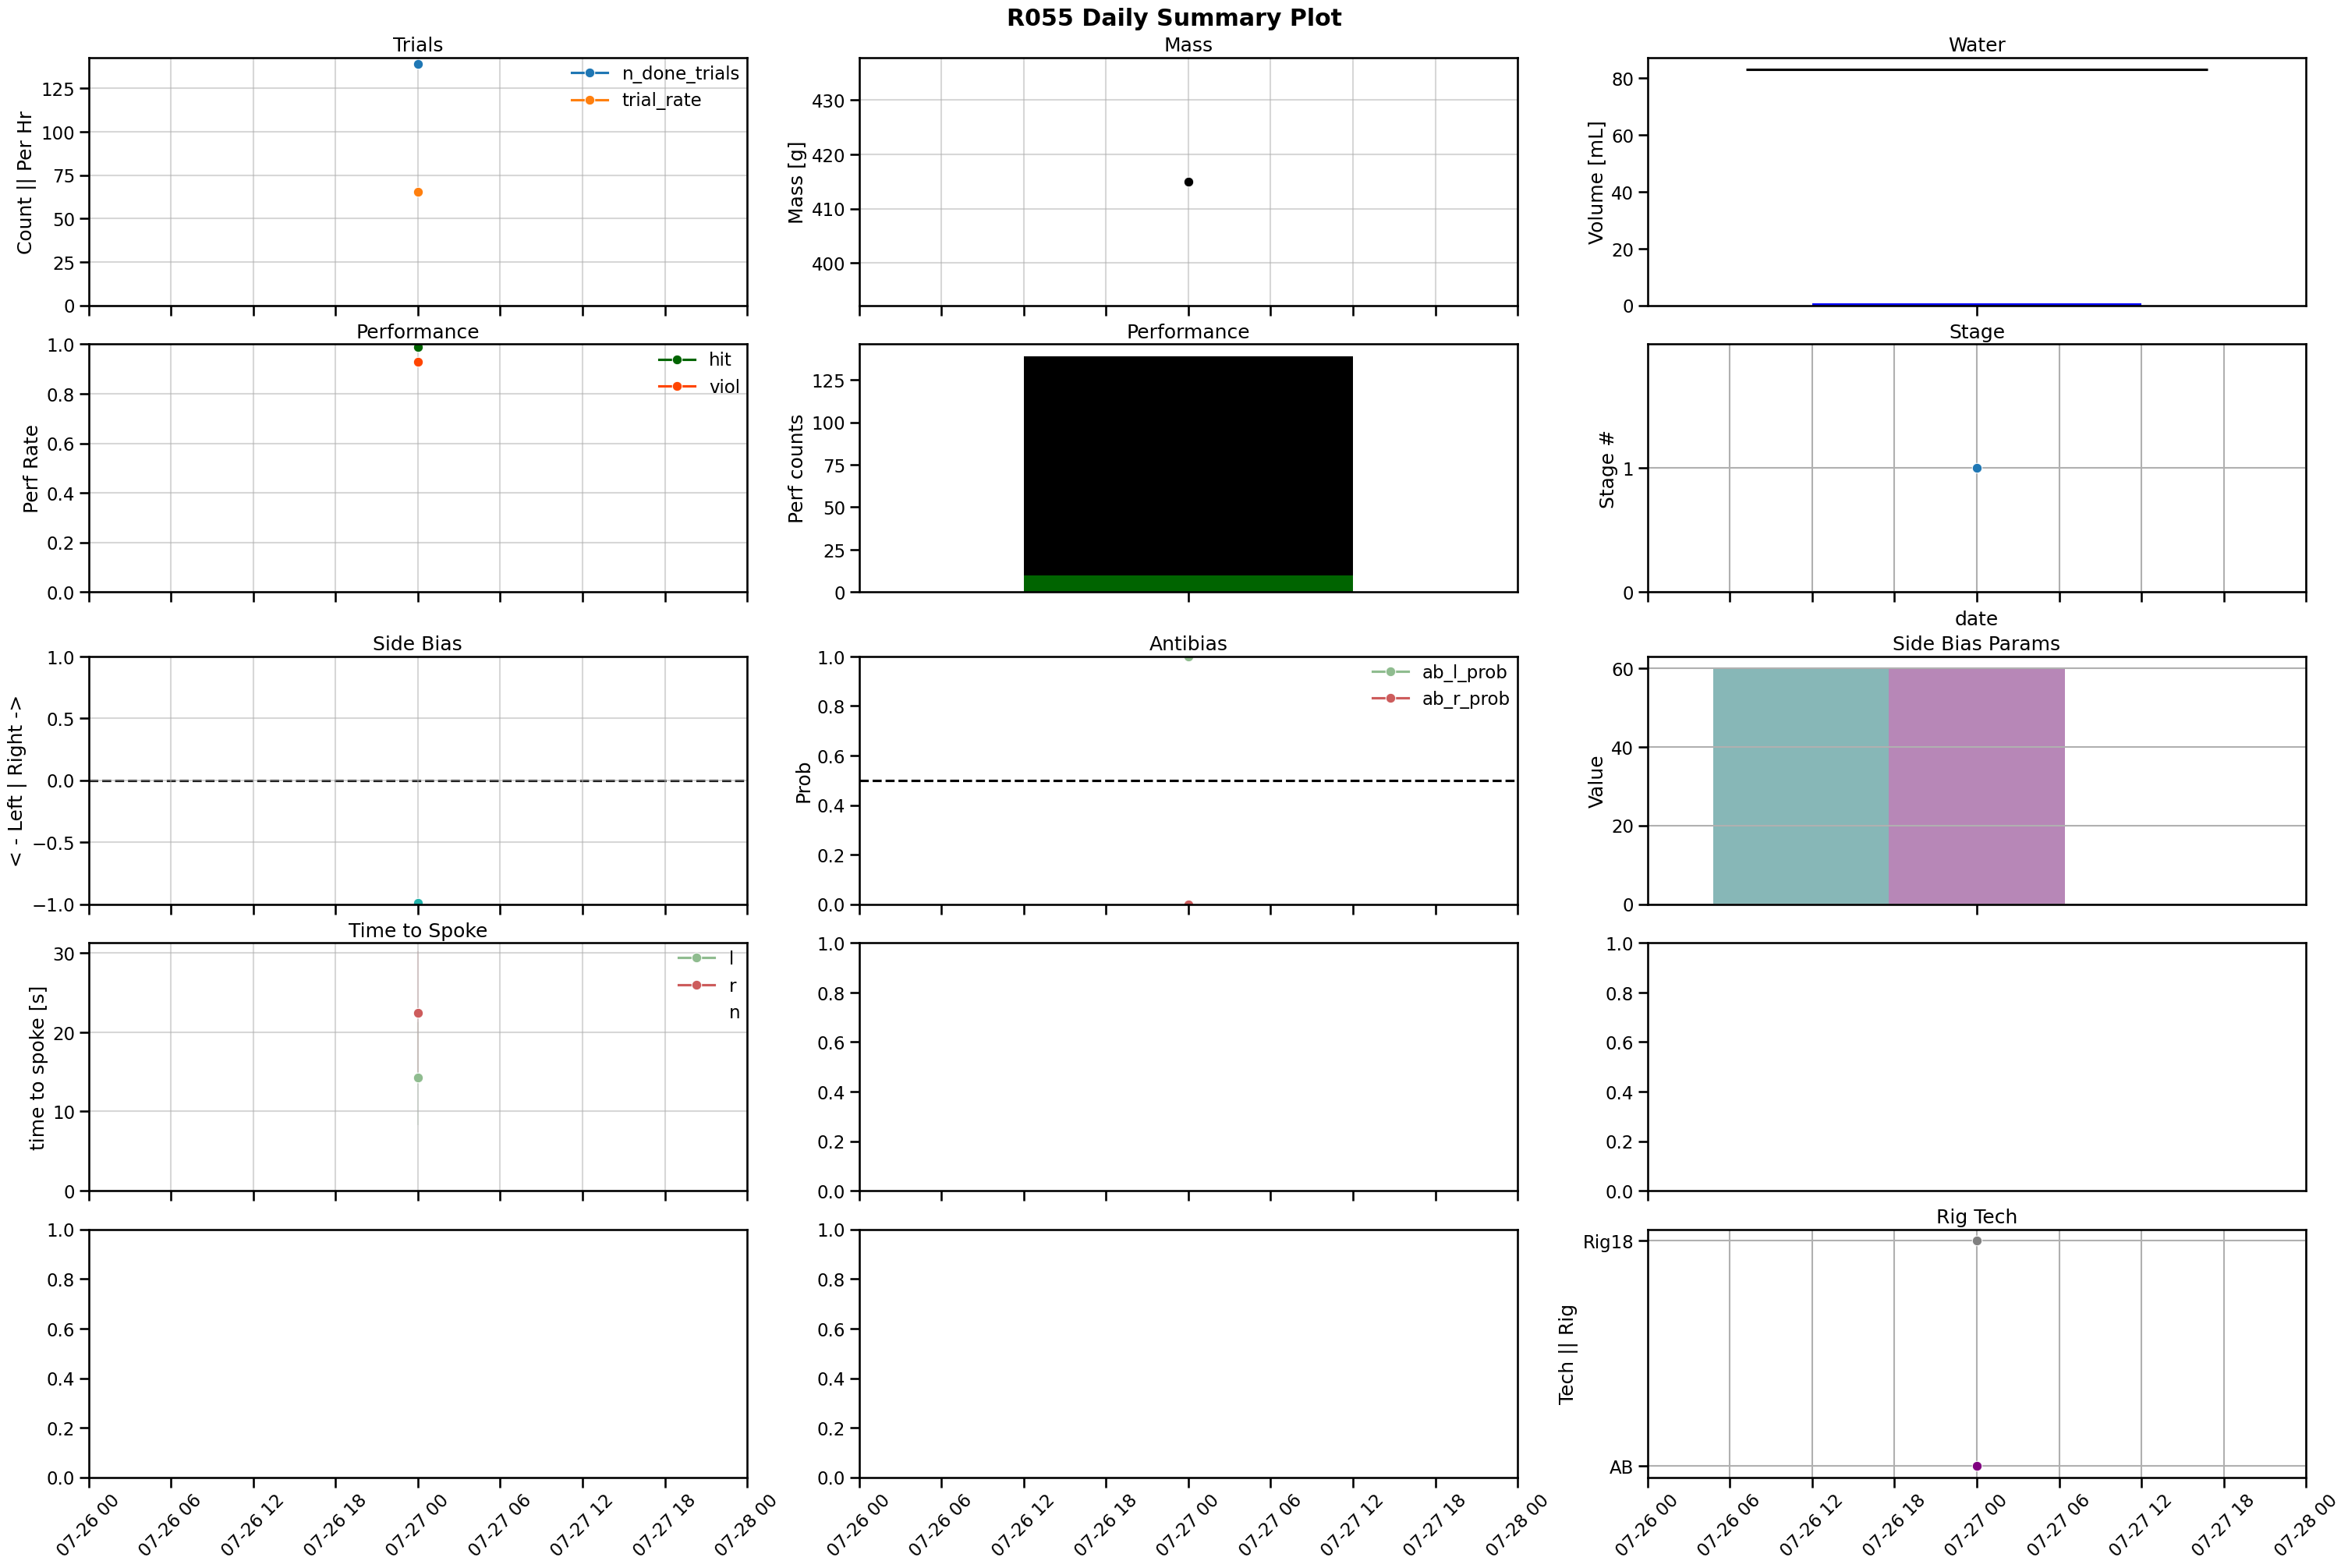

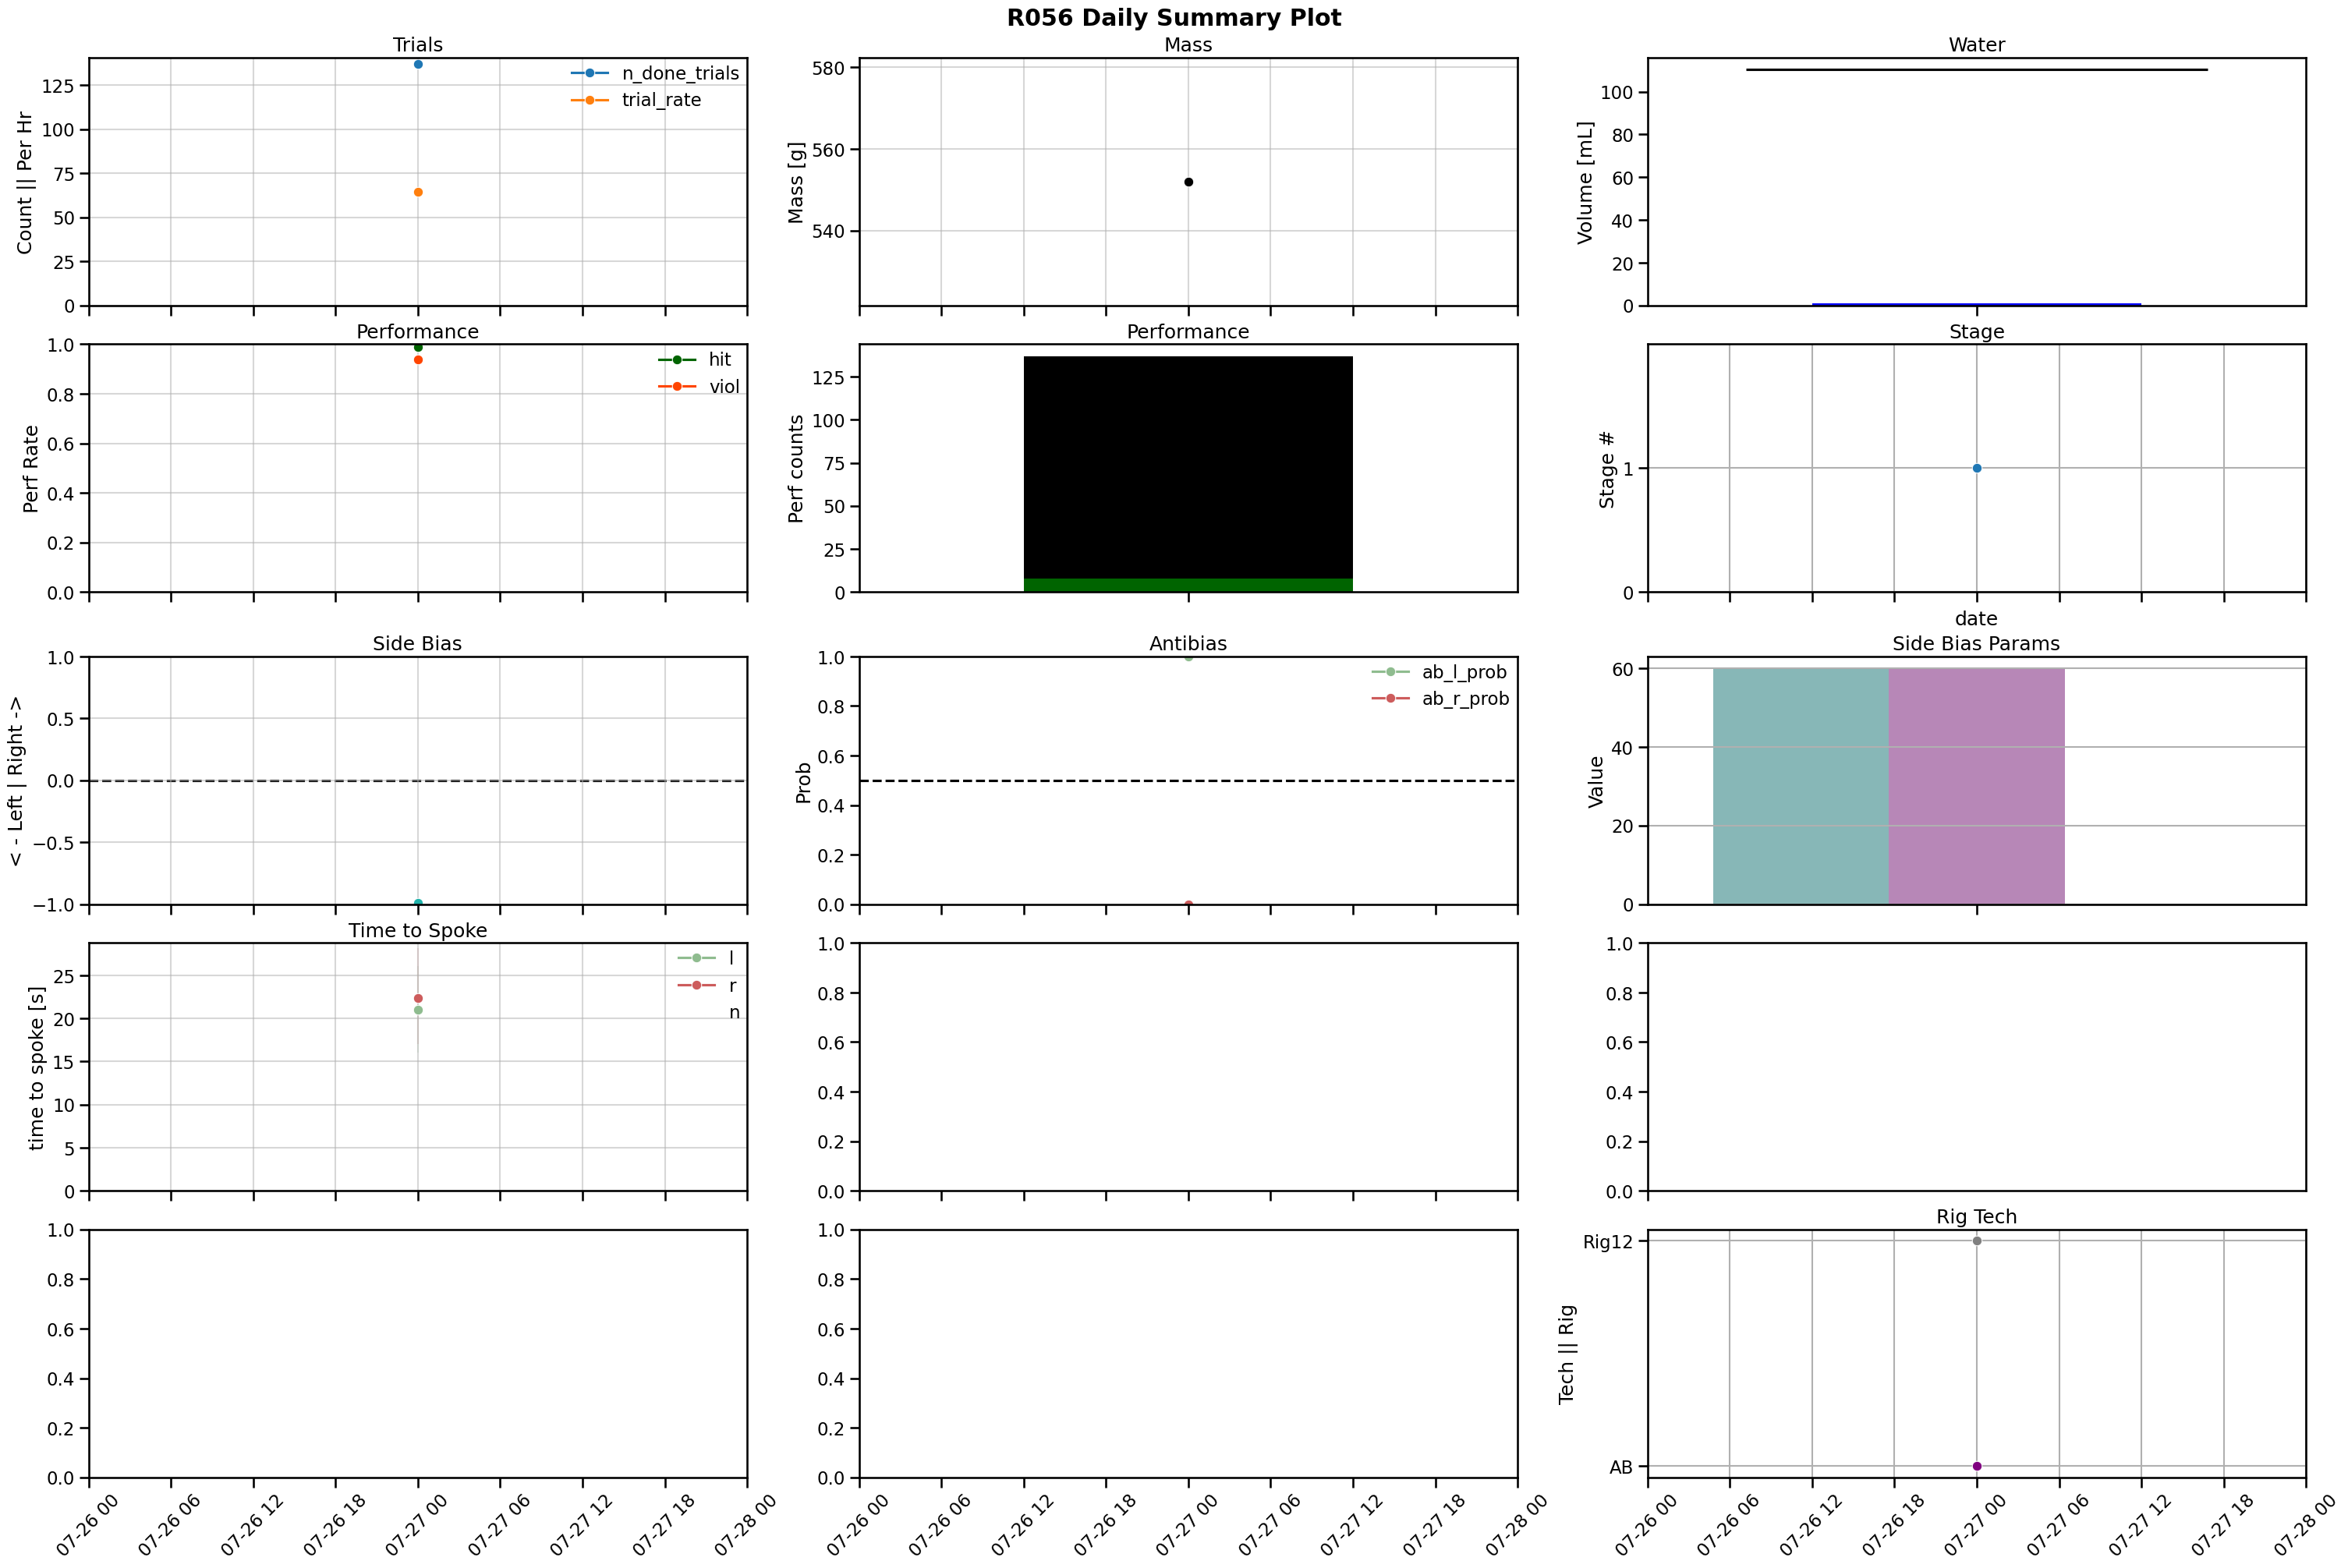

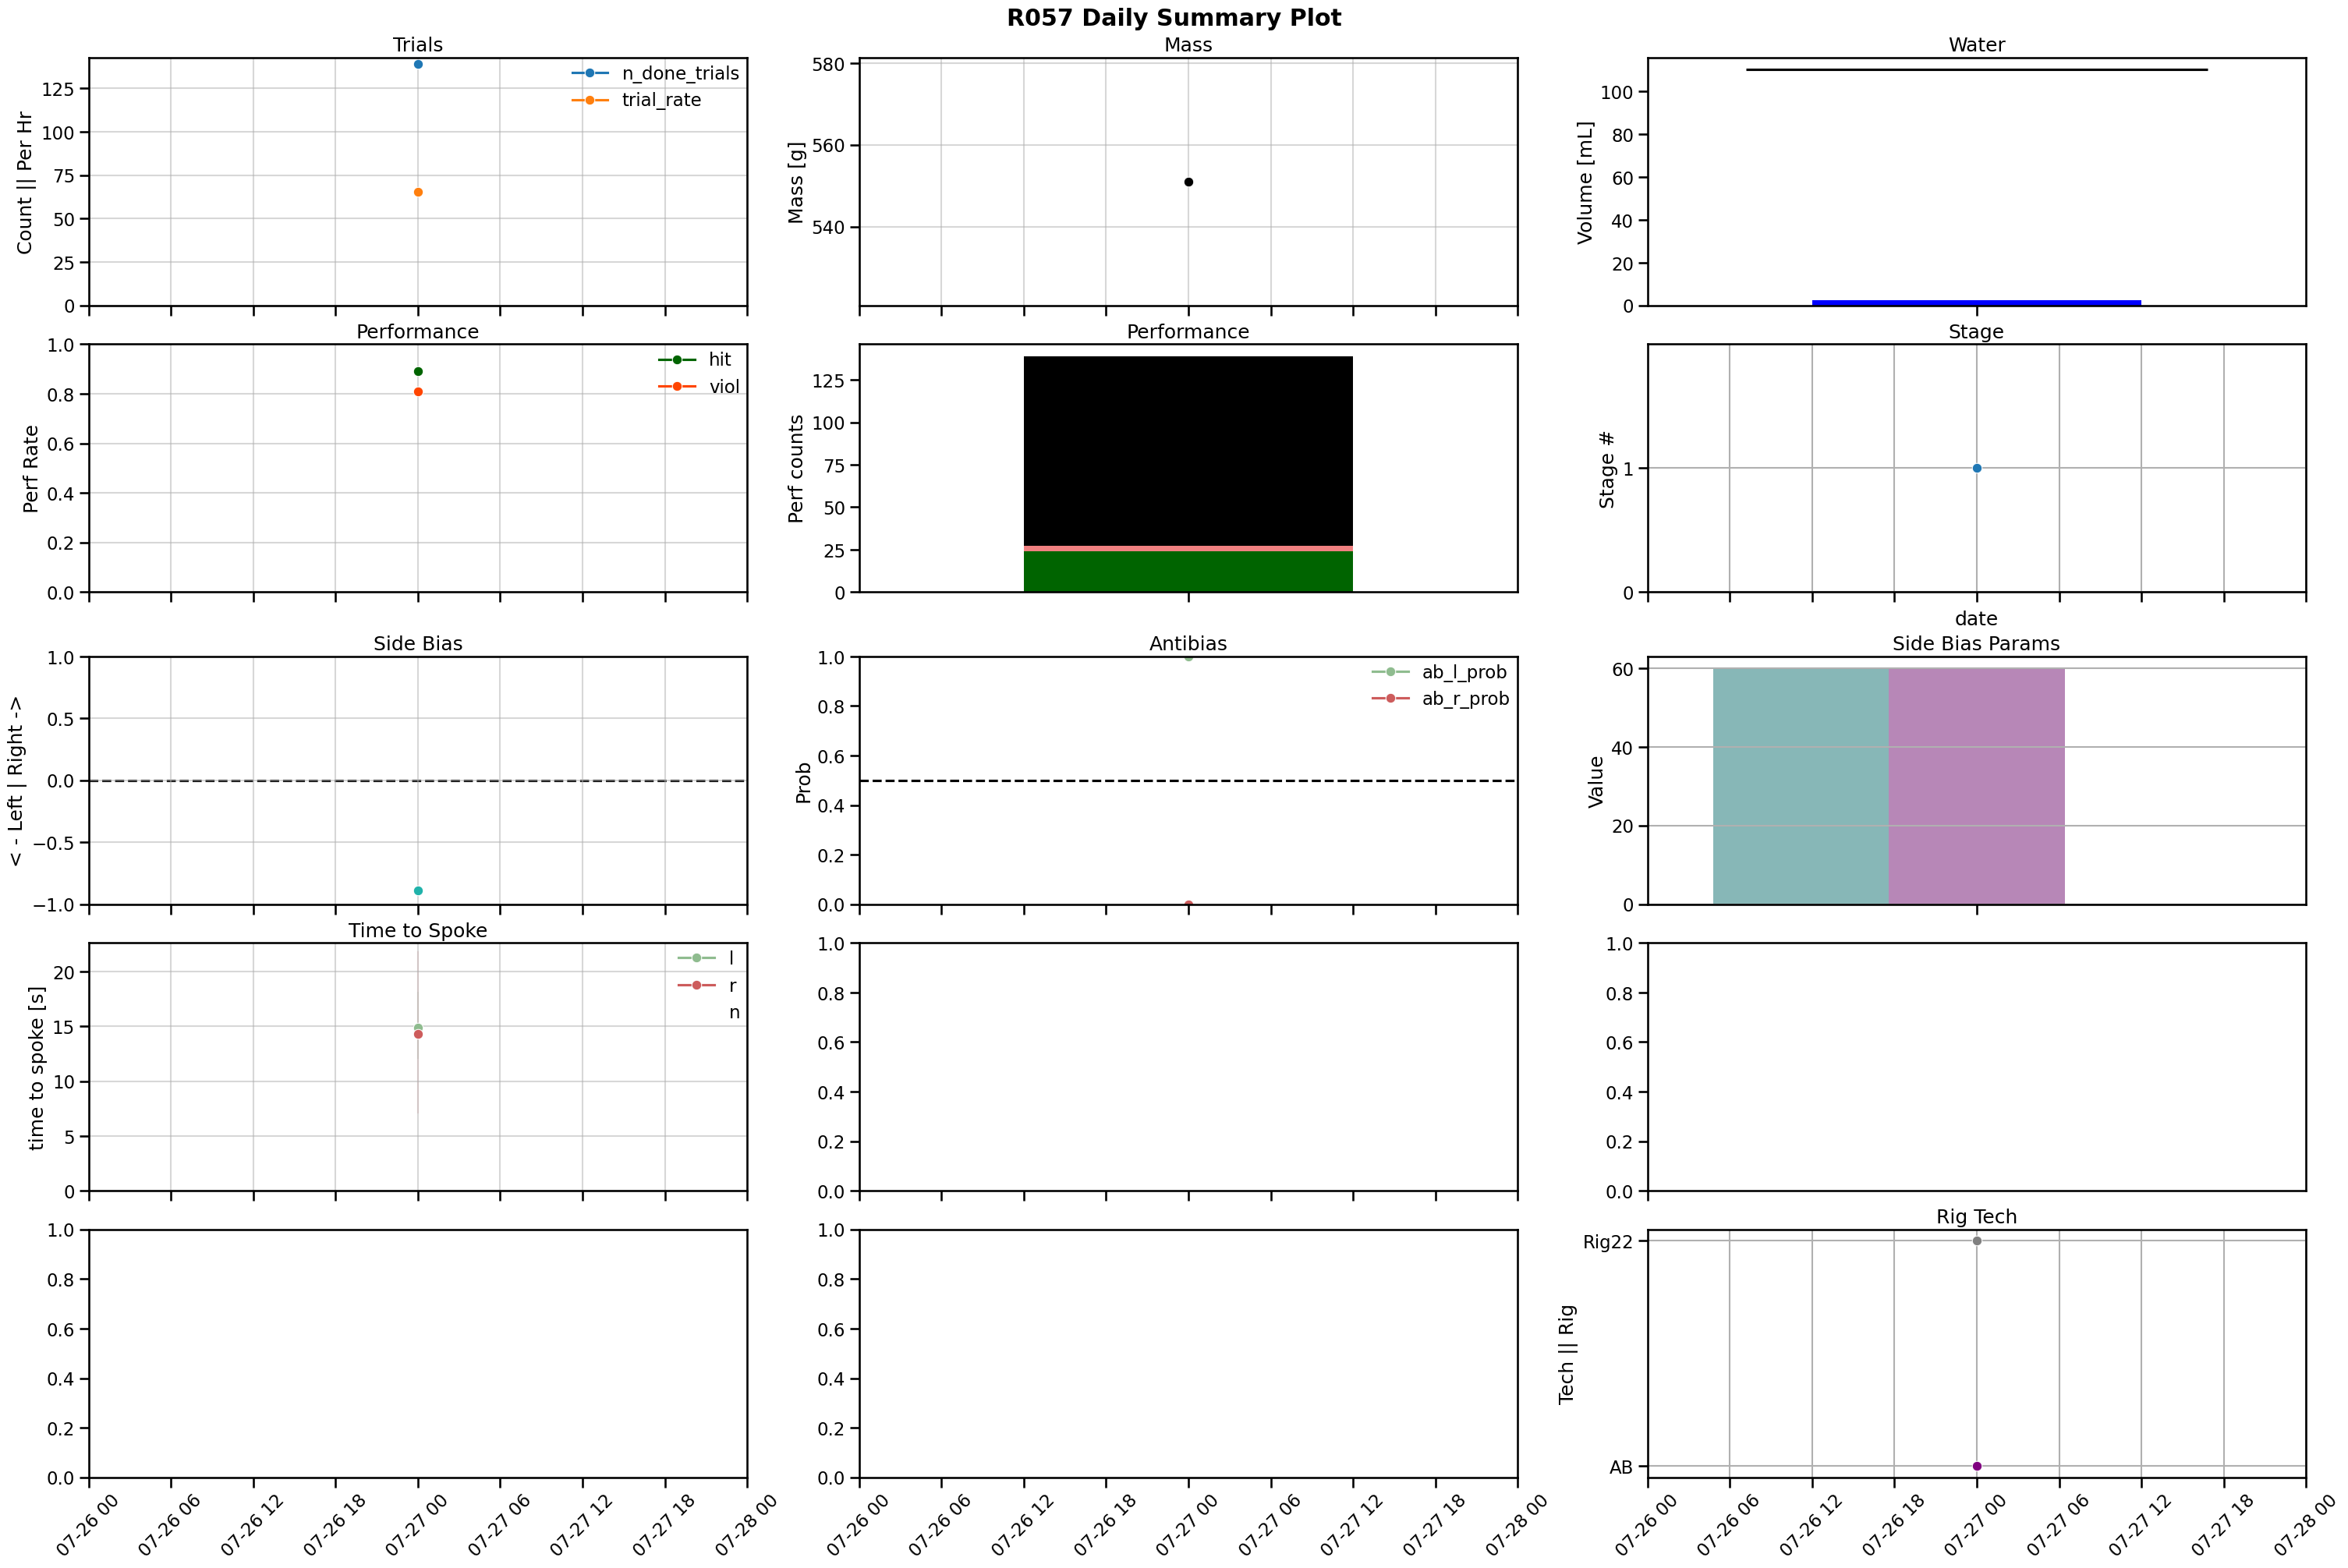

In [55]:
# ALPHA_2_SESSION_6 = set(ALPHA_2_ANIMALS) & set(ALPHA_SESSION_6)
for animal_id, animal_days_df in days_df.query("animal_id in @ALPHA_SESSION_7").groupby(
    "animal_id"
):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

## Session 6 animals Plot Within Day (Saved Out)

In [56]:
viz.summarize.single_day_summaries(
    trials_df.query("animal_id in @ALPHA_SESSION_7"),
    figures_path=FIGURES_PATH,
    save_out=True,
    overwrite=False,
)

making R052_2024-07-27_day_summary
R052 2024-07-27 spoke only stage
making R053_2024-07-27_day_summary
R053 2024-07-27 spoke only stage
making R054_2024-07-27_day_summary
R054 2024-07-27 spoke only stage
making R055_2024-07-27_day_summary
R055 2024-07-27 spoke only stage
making R056_2024-07-27_day_summary
R056 2024-07-27 spoke only stage
making R057_2024-07-27_day_summary
R057 2024-07-27 spoke only stage
